In [71]:
# Import essential libraries for data manipulation, visualization, and audio processing.
import numpy as np           # Numerical computing library
import pandas as pd          # Data manipulation and analysis library
import matplotlib.pyplot as plt  # Plotting library for creating static visualizations
import librosa               # Audio analysis library for music and audio applications
import librosa.display       # Functions for visualizing audio data (e.g., waveforms, spectrograms)
from collections import Counter # Utility for counting hashable objects (not explicitly used here but often useful)

In [72]:
import os
import librosa
import warnings

# Define the root directory where the music genre subfolders are stored.
DATA_DIR = "/content/drive/My Drive/TUD/Projects/Music Genre Classification/Data/genres_original"

# Get a list of all genre names by listing the directories within the DATA_DIR.
# These directory names will serve as our labels for classification.
genres = os.listdir(DATA_DIR)
print("Genres found:", genres)

# Initialize empty lists to store the processed audio data and metadata.
audio_signals = []  # Stores the actual audio time-series data (numpy arrays)
sample_rates = []   # Stores the original sample rate for each audio file
labels = []         # Stores the genre label for each audio file
file_paths = []     # Stores the full path to each audio file

# Loop through each identified genre to load its corresponding audio files.
for genre in genres:
    genre_path = os.path.join(DATA_DIR, genre)
    # Ensure that we are only processing actual directories, not files or hidden items.
    if not os.path.isdir(genre_path):
        continue

    print(f"Loading audio files for genre: {genre}")

    # Iterate through each file within the current genre directory.
    for file in os.listdir(genre_path):
        # We are only interested in '.wav' audio files for this project.
        if file.endswith(".wav"):
            file_path = os.path.join(genre_path, file)

            try:
                # Load the audio file using librosa.load.
                # sr=None ensures that the original sample rate of the audio is preserved.
                signal, sr = librosa.load(file_path, sr=None)

                # Append the loaded data to our lists.
                audio_signals.append(signal)
                sample_rates.append(sr)
                labels.append(genre)
                file_paths.append(file_path)
            except Exception as e:
                # If an audio file fails to load (e.g., corrupted file), log a warning
                # and skip to the next file to prevent the script from crashing.
                warnings.warn(f"Could not load {file_path}: {e}")
                continue  # Move to the next file

# Print the total number of audio files successfully loaded to confirm the dataset size.
print("Total audio files loaded:", len(audio_signals))

Genres found: ['blues', 'classical', 'disco', 'country', 'reggae', 'metal', 'hiphop', 'pop', 'jazz', 'rock', 'val.csv', 'train.csv', 'test.csv', 'best_ast.pt']
Loading audio files for genre: blues
Loading audio files for genre: classical
Loading audio files for genre: disco
Loading audio files for genre: country
Loading audio files for genre: reggae
Loading audio files for genre: metal
Loading audio files for genre: hiphop
Loading audio files for genre: pop
Loading audio files for genre: jazz


/tmp/ipython-input-2206597885.py:37: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-2206597885.py:47: UserWarning: Could not load /content/drive/My Drive/TUD/Projects/Music Genre Classification/Data/genres_original/jazz/jazz.00054.wav: 
  warnings.warn(f"Could not load {file_path}: {e}")


Loading audio files for genre: rock
Total audio files loaded: 985


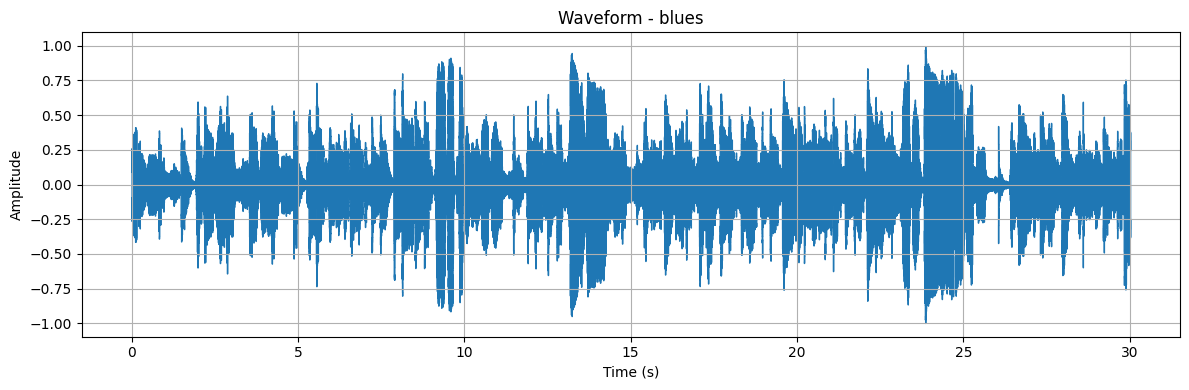

In [73]:
import matplotlib.pyplot as plt
import librosa.display

# Let's pick the very first loaded audio signal to visualize its waveform.
# This helps us get a feel for the raw audio data.
idx = 0  # We'll look at the first track loaded.

plt.figure(figsize=(12, 4)) # Set up a nice figure size for better viewing.

# Use librosa's display function to plot the waveform.
# It shows amplitude over time.
librosa.display.waveshow(audio_signals[idx], sr=sample_rates[idx])

# Add a title to the plot so we know what we're looking at.
plt.title(f"Waveform - {labels[idx]}")
plt.xlabel("Time (s)") # Label the x-axis for clarity
plt.ylabel("Amplitude") # Label the y-axis
plt.grid(True) # Add a grid for easier reading of values
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot.

In [74]:
import pandas as pd

# To get more insights, let's calculate the duration of each audio track.
# We can do this by dividing the number of samples by the sample rate.
durations = [len(x) / sr for x, sr in zip(audio_signals, sample_rates)]

# Now, let's gather all our collected metadata into a neat Pandas DataFrame.
# This makes it super easy to inspect and analyze the dataset.
data = pd.DataFrame({
    "file_path": file_paths,
    "genre": labels,
    "sample_rate": sample_rates,
    "duration_sec": durations
})

# Display the first few rows of our new DataFrame to ensure everything looks correct.
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
                                           file_path  genre  sample_rate  \
0  /content/drive/My Drive/TUD/Projects/Music Gen...  blues        22050   
1  /content/drive/My Drive/TUD/Projects/Music Gen...  blues        22050   
2  /content/drive/My Drive/TUD/Projects/Music Gen...  blues        22050   
3  /content/drive/My Drive/TUD/Projects/Music Gen...  blues        22050   
4  /content/drive/My Drive/TUD/Projects/Music Gen...  blues        22050   

   duration_sec  
0     30.013333  
1     30.013333  
2     30.013333  
3     30.013333  
4     30.013333  


In [75]:
# Let's take a quick look at the overall statistics of our dataset.
# First, the total number of tracks we've managed to load.
print("Total tracks loaded into DataFrame:", len(data))

# How many unique music genres do we have? This should be 10 for the GTZAN dataset.
print("Number of unique genres:", data['genre'].nunique())

# And a detailed count of tracks for each genre, to check for class balance.
print("\nTracks per genre (distribution):")
print(data['genre'].value_counts())

Total tracks loaded into DataFrame: 985
Number of unique genres: 10

Tracks per genre (distribution):
genre
blues        100
classical    100
country      100
disco         99
reggae        99
rock          99
jazz          99
pop           98
hiphop        98
metal         93
Name: count, dtype: int64


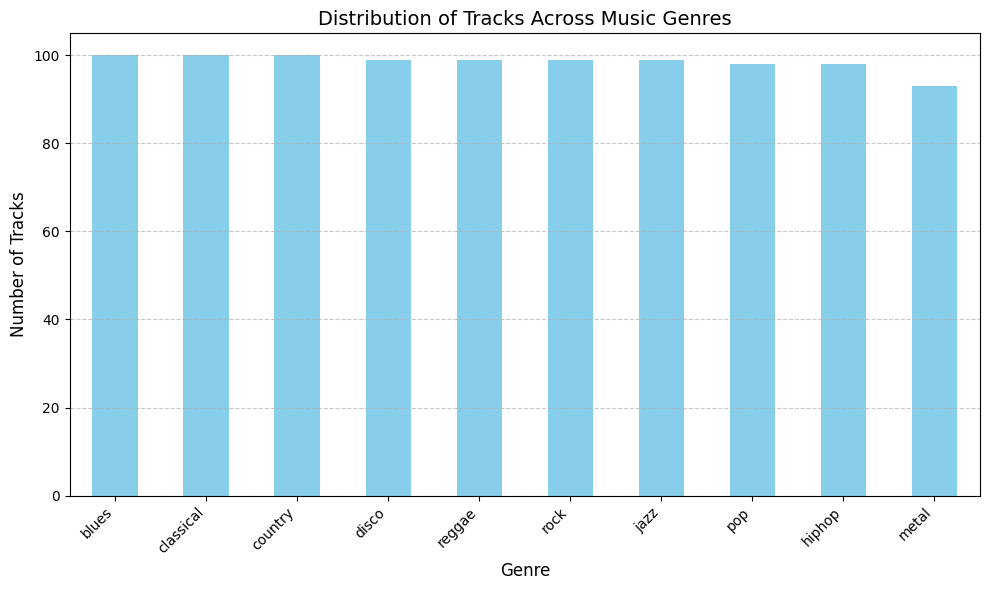

In [76]:
import matplotlib.pyplot as plt

# Visualizing the genre distribution helps confirm our dataset's balance.
plt.figure(figsize=(10, 6)) # A reasonable size for a bar chart.

# Plotting the count of each genre.
data['genre'].value_counts().plot(kind='bar', color='skyblue')

# Adding a descriptive title and axis labels.
plt.title("Distribution of Tracks Across Music Genres", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of Tracks", fontsize=12)

# Rotate x-axis labels for better readability if genre names are long.
plt.xticks(rotation=45, ha='right') # 'ha' means horizontal alignment.
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid
plt.tight_layout() # Adjusts plot to fit into figure area.
plt.show() # Show the plot!

Sample rate distribution across all tracks:
sample_rate
22050    985
Name: count, dtype: int64


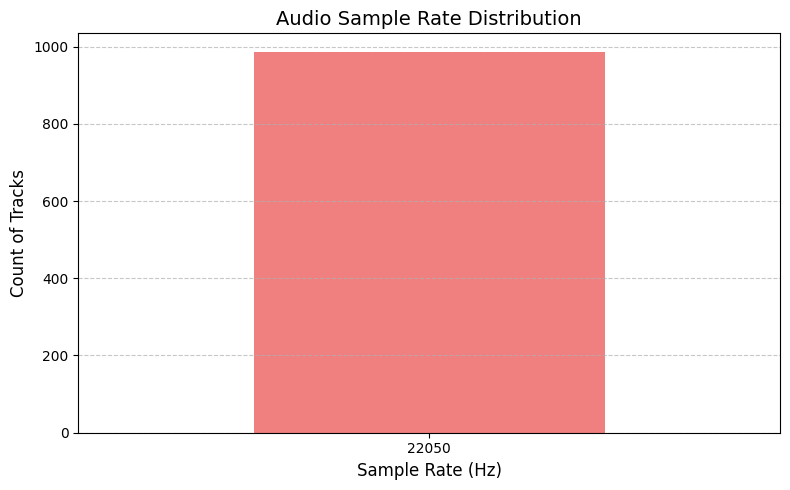

In [77]:
import matplotlib.pyplot as plt

# It's important to check the sample rate consistency across our audio files.
# Let's see the distribution of sample rates.
print("Sample rate distribution across all tracks:")
print(data['sample_rate'].value_counts())

# And a visual representation for quick understanding.
plt.figure(figsize=(8, 5))
data['sample_rate'].value_counts().plot(kind='bar', color='lightcoral')

plt.title("Audio Sample Rate Distribution", fontsize=14)
plt.xlabel("Sample Rate (Hz)", fontsize=12)
plt.ylabel("Count of Tracks", fontsize=12)
plt.xticks(rotation=0) # Sample rates are numbers, usually no need to rotate
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Summary statistics for track durations (in seconds):
count    985.000000
mean      30.023658
std        0.079026
min       29.931973
25%       30.000181
50%       30.013333
75%       30.013333
max       30.648889
Name: duration_sec, dtype: float64


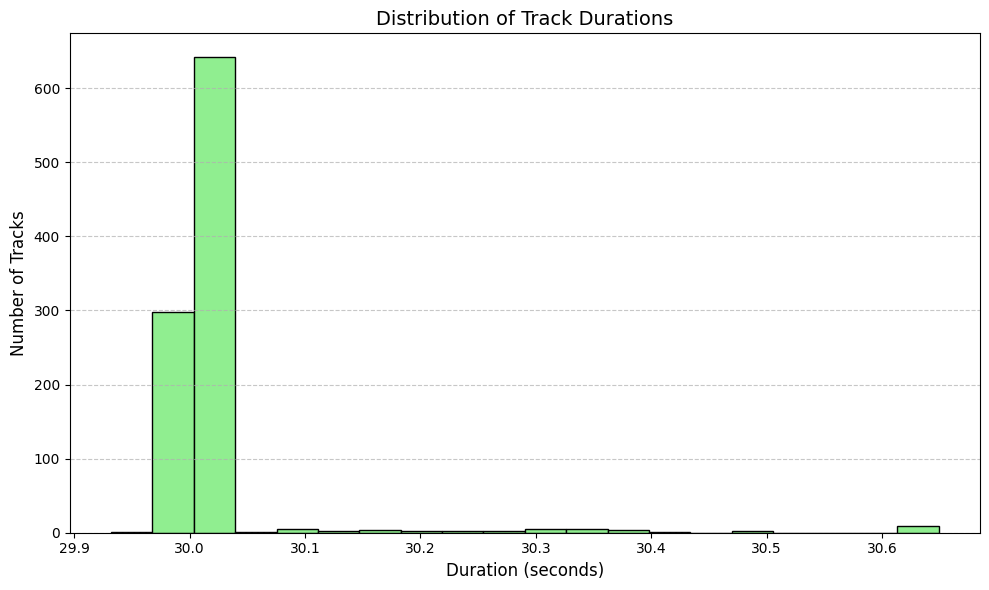

In [78]:
import matplotlib.pyplot as plt

# Let's get some basic descriptive statistics for track durations.
# This gives us a quick summary of minimum, maximum, average, etc.
print("Summary statistics for track durations (in seconds):")
print(data['duration_sec'].describe())

# A histogram is great for visualizing the distribution of durations.
plt.figure(figsize=(10, 6))
# We'll use 20 bins to show the spread of durations, with clear edges.
plt.hist(data['duration_sec'], bins=20, edgecolor='black', color='lightgreen')

plt.title("Distribution of Track Durations", fontsize=14)
plt.xlabel("Duration (seconds)", fontsize=12)
plt.ylabel("Number of Tracks", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Make sure everything fits nicely.
plt.show()

<Figure size 1200x600 with 0 Axes>

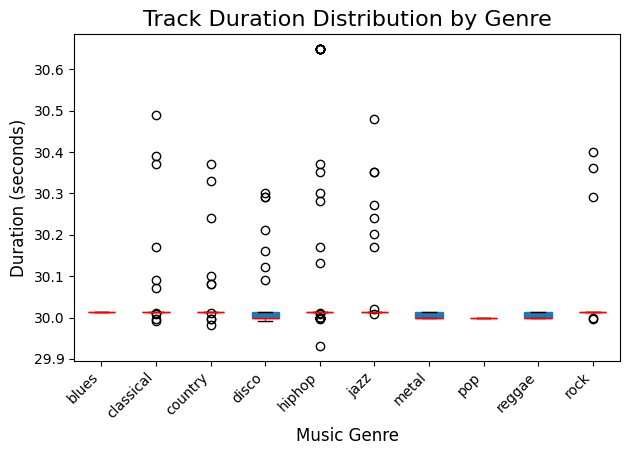

In [79]:
import matplotlib.pyplot as plt

# A box plot helps us compare the duration distribution across different genres.
# This can reveal if certain genres typically have longer or shorter tracks.
plt.figure(figsize=(12, 6)) # A wider figure to accommodate all genres.

# Using pandas' built-in boxplot function for convenience.
# We plot 'duration_sec' and group by 'genre'.
data.boxplot(column='duration_sec', by='genre', grid=False, patch_artist=True, medianprops={'color': 'red'})

# We'll set the main title and remove the automatic super title that pandas adds.
plt.title("Track Duration Distribution by Genre", fontsize=16)
plt.suptitle("")  # Clear the automatic super title for a cleaner look.
plt.xlabel("Music Genre", fontsize=12)
plt.ylabel("Duration (seconds)", fontsize=12)

# Rotate x-axis labels to prevent overlap and improve readability.
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout() # Adjust everything to prevent clipping.
plt.show() # Show the comparison plot.

Visualizing waveform examples for each genre...


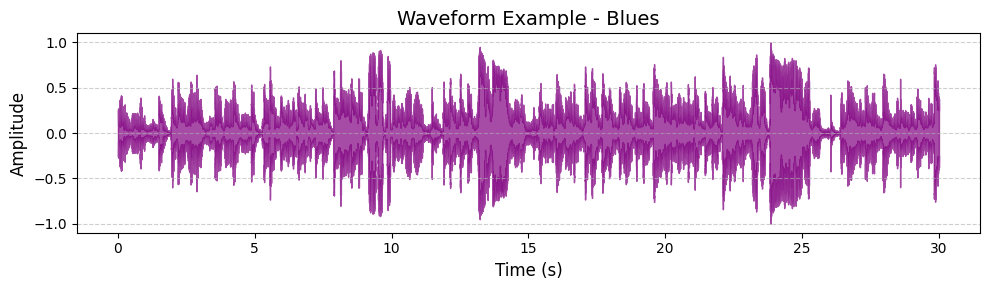

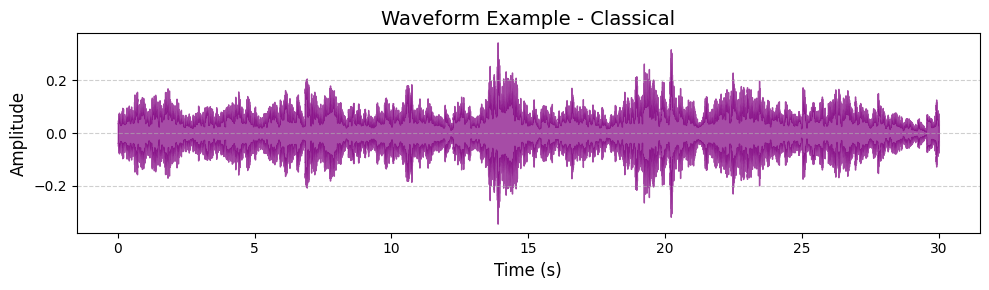

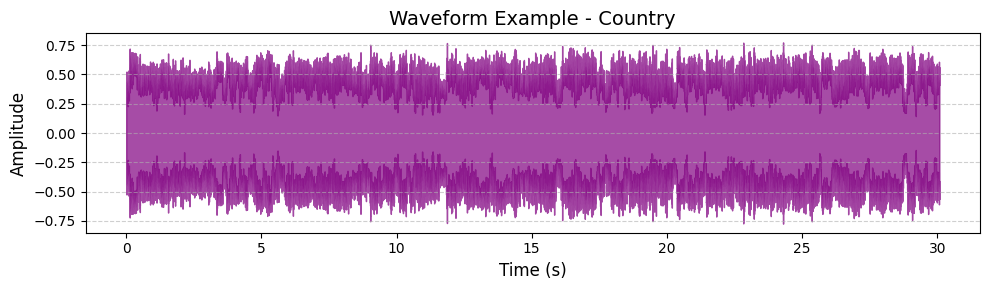

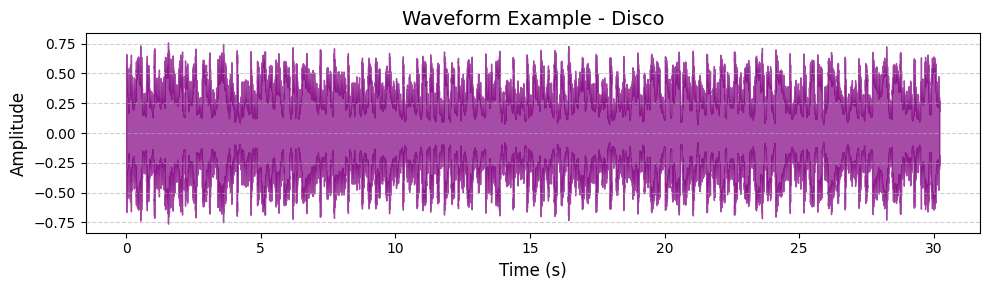

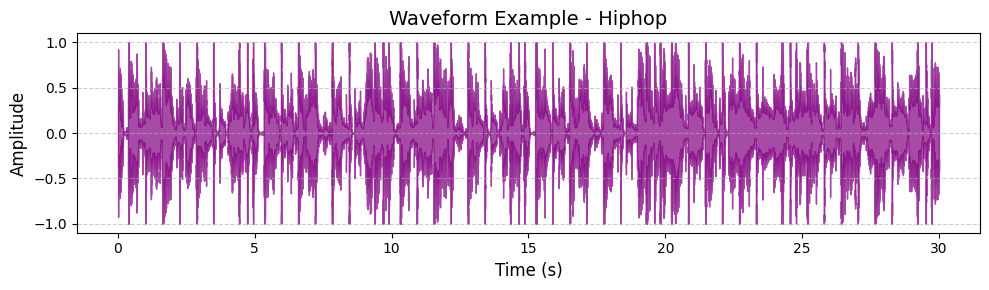

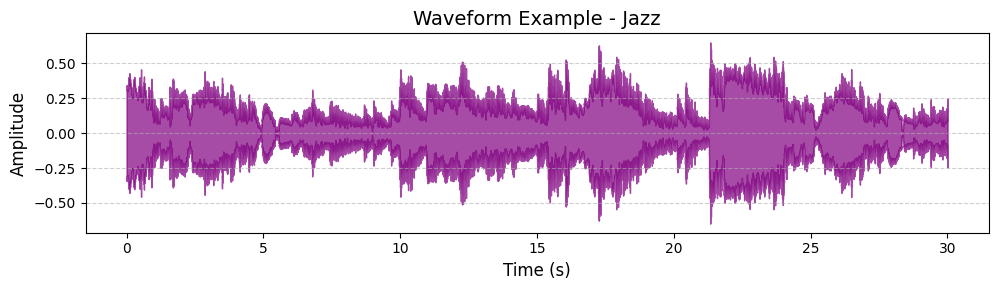

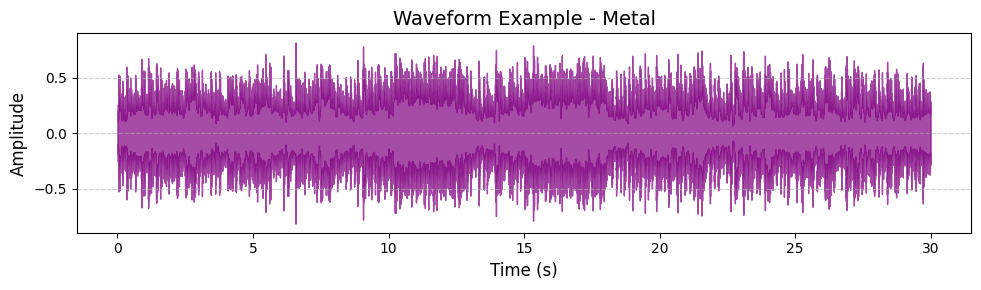

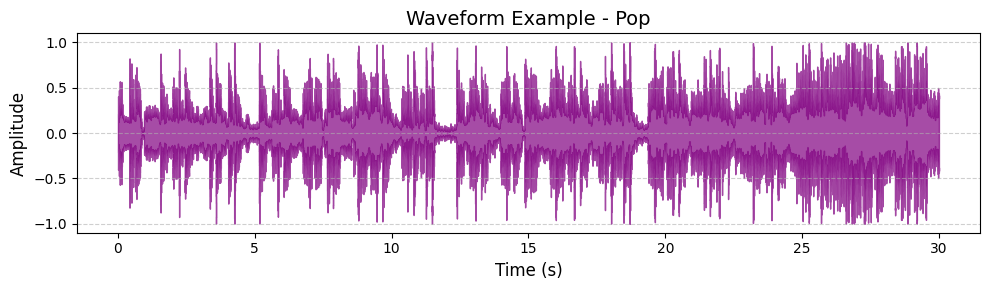

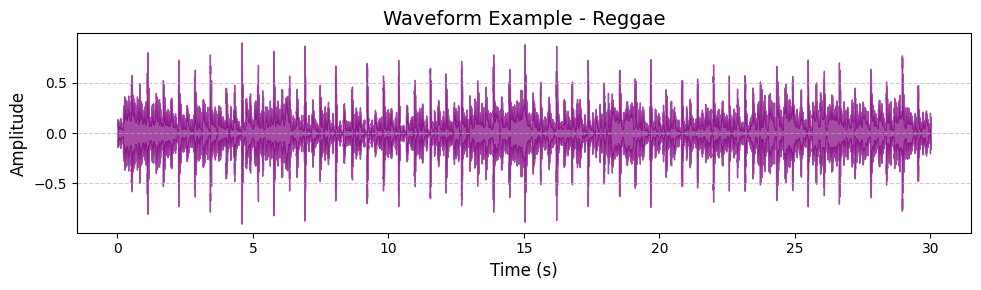

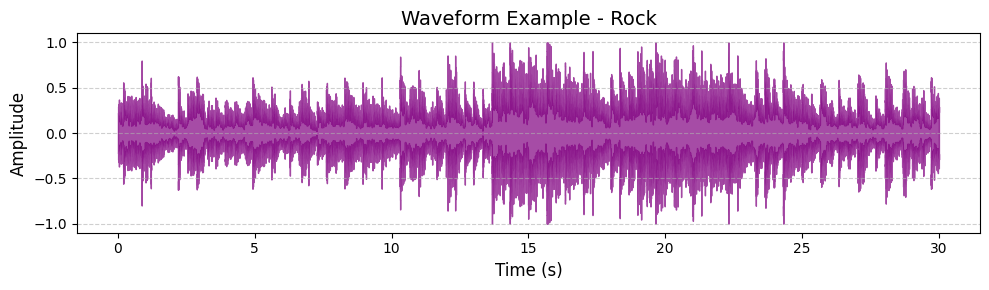

In [80]:
import matplotlib.pyplot as plt
import librosa.display
import librosa
import warnings

# Let's grab the unique genre names and sort them alphabetically for consistent plotting.
genres = sorted(data['genre'].unique())

print("Visualizing waveform examples for each genre...")
# Loop through each genre to display a sample waveform.
for g in genres:
    # Find the first track belonging to the current genre.
    # Using .iloc[0] ensures we get the first entry after filtering.
    row = data[data['genre'] == g].iloc[0]

    # Extract the sample rate and file path for this specific track.
    sr = row['sample_rate']
    file_path = row['file_path']

    try:
        # Load the audio signal using librosa, ensuring the correct sample rate is used.
        signal, _ = librosa.load(file_path, sr=sr)

        # Create a new figure for each waveform to keep plots separate and clear.
        plt.figure(figsize=(10, 3))

        # Plot the waveform using librosa's display utility.
        librosa.display.waveshow(signal, sr=sr, alpha=0.7, color='purple')

        # Add a descriptive title for the current genre's waveform.
        plt.title(f"Waveform Example - {g.capitalize()}", fontsize=14)
        plt.xlabel("Time (s)", fontsize=12)
        plt.ylabel("Amplitude", fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout() # Adjust layout to prevent overlaps.
        plt.show() # Display the plot.
    except Exception as e:
        # If a file cannot be loaded, just print a warning and move on.
        warnings.warn(f"Could not load waveform for {g} from {file_path}: {e}")
        continue

Generating mel spectrogram examples for the first 4 genres...


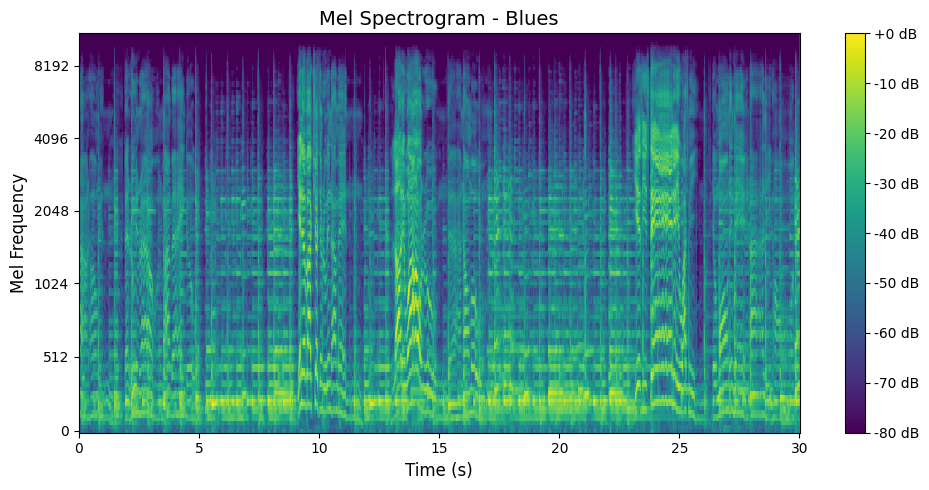

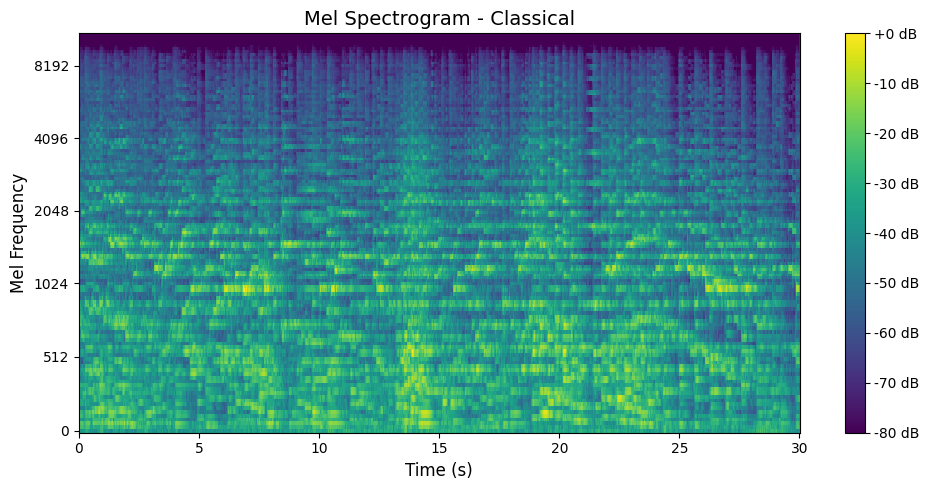

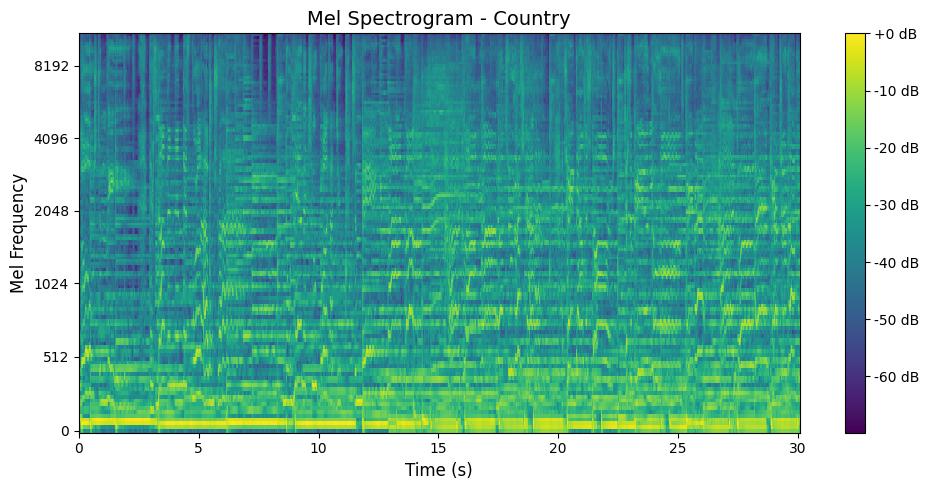

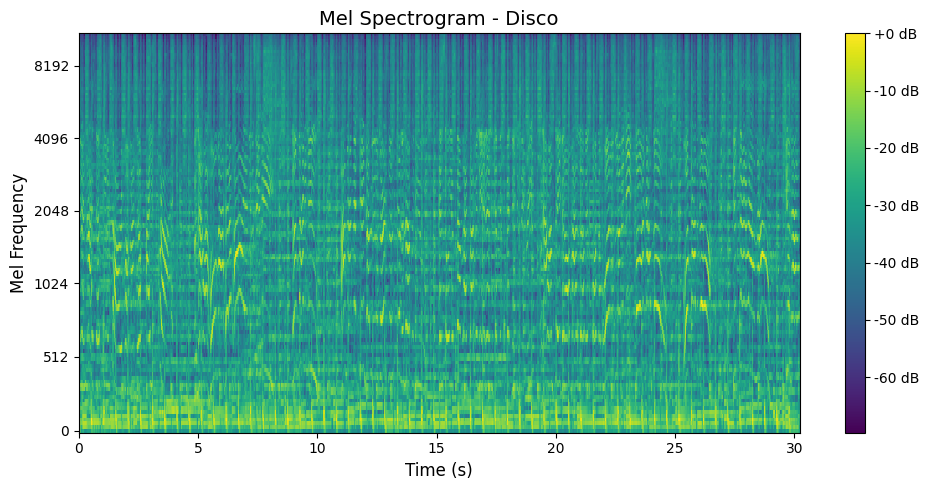

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import warnings

# Spectrograms are a powerful way to visualize frequency content over time.
# Let's generate and display mel spectrograms for a few example genres.

print("Generating mel spectrogram examples for the first 4 genres...")
# Iterate through the first few genres for demonstration purposes.
for g in genres[:4]:  # We'll just show the first 4 to keep things concise.
    # Get the first track's data for the current genre.
    row = data[data['genre'] == g].iloc[0]
    sr = row['sample_rate']
    file_path = row['file_path']

    try:
        # Load the audio signal.
        signal, _ = librosa.load(file_path, sr=sr)

        # Create a mel spectrogram: a common representation for audio analysis.
        # n_mels=128 is a standard choice for the number of mel bands.
        # The result 'S' represents power at different frequencies over time.
        S = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=128)

        # Convert the power spectrogram to decibels (log scale) for better visualization.
        # 'ref=np.max' normalizes the spectrogram so the loudest part is 0 dB.
        S_db = librosa.power_to_db(S, ref=np.max)

        # Plotting the mel spectrogram.
        plt.figure(figsize=(10, 5)) # Set a good size for the plot.
        librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')

        # Add a title, color bar, and adjust layout.
        plt.title(f"Mel Spectrogram - {g.capitalize()}", fontsize=14)
        plt.colorbar(format='%+2.0f dB') # Color bar shows dB values.
        plt.xlabel("Time (s)", fontsize=12)
        plt.ylabel("Mel Frequency", fontsize=12)
        plt.tight_layout() # Ensure all elements fit nicely.
        plt.show() # Display the spectrogram.
    except Exception as e:
        warnings.warn(f"Could not generate spectrogram for {g} from {file_path}: {e}")
        continue

In [82]:
import os

# It's good practice to check for duplicate entries in our dataset.
# First, let's see if there are any duplicate file paths, which would indicate an error in data collection or loading.
print("Checking for duplicate file paths in the dataset:", data['file_path'].duplicated().sum())

# Sometimes, files might have different paths but the same name if copied.
# Let's extract just the file names and check for duplicates there as well.
data['file_name'] = data['file_path'].apply(lambda x: os.path.basename(x))
print("Checking for duplicate file names:", data['file_name'].duplicated().sum())

# Note: This check only looks at paths/names. For true content duplicates, we'd need to hash file contents, which is done later in the preprocessing step.

Checking for duplicate file paths in the dataset: 0
Checking for duplicate file names: 0


In [83]:
import os
import hashlib # For creating file hashes to detect content-based duplicates.
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder # To convert genre names to numerical labels.
from sklearn.model_selection import train_test_split # For splitting our dataset.

# Define the root directory where our genre folders are located.
DATA_DIR = "/content/drive/My Drive/TUD/Projects/Music Genre Classification/Data/genres_original"

# --- Audio Parameters ---
# Standard sample rate for audio processing (common in many audio tasks).
TARGET_SR = 22050
# Each track in the GTZAN dataset is approximately 30 seconds long.
TRACK_DURATION = 30.0  # seconds
# Calculate the total number of audio samples for a fixed-length track.
SAMPLES_PER_TRACK = int(TARGET_SR * TRACK_DURATION)

# --- Feature (Log-Mel Spectrogram) Parameters ---
# Number of FFT components, influencing frequency resolution.
N_FFT = 2048
# Number of samples between successive frames, affecting time resolution.
HOP_LENGTH = 512
# Number of Mel bands to generate, determining the mel spectrogram's height.
N_MELS = 128

# --- Segment Parameters ---
# We'll split each 30-second track into smaller, more manageable segments.
# This increases the effective dataset size and can improve model generalization.
SEGMENT_DURATION = 3.0 # We choose 3-second segments.
# Number of samples in each segment.
SEGMENT_SAMPLES = int(TARGET_SR * SEGMENT_DURATION)
# How many segments can we get from one full track? (30s / 3s = 10 segments).
SEGMENTS_PER_TRACK = int(SAMPLES_PER_TRACK / SEGMENT_SAMPLES)

print("Preprocessing parameters initialized.")

Preprocessing parameters initialized.


In [84]:
import os
import hashlib
import shutil # For moving files, not just deleting.
import warnings # To warn about issues without stopping execution.

print("Starting duplicate file detection and handling...")

# ============================
# 1. Remove duplicate audio files (based on content hash)
# ============================

def file_hash(filepath):
    """Calculates the SHA-256 hash of a file's binary content.
       This is a reliable way to detect identical files, regardless of name or location."""
    hasher = hashlib.sha256()
    # Open the file in binary read mode.
    with open(filepath, "rb") as f:
        # Read the entire file content.
        buf = f.read()
        # Update the hasher with the file's content.
        hasher.update(buf)
    return hasher.hexdigest()


hash_dict = {}       # Stores: content_hash -> first_encountered_file_path
duplicates = []      # List to collect paths of all duplicate files found.

# Traverse through each genre directory to find audio files.
for genre in os.listdir(DATA_DIR):
    genre_path = os.path.join(DATA_DIR, genre)
    # Skip if it's not a directory (e.g., a stray file like 'train.csv').
    if not os.path.isdir(genre_path):
        continue

    # Iterate over files within the current genre folder.
    for f in os.listdir(genre_path):
        # We're only interested in WAV audio files.
        if f.endswith(".wav"):
            fp = os.path.join(genre_path, f)
            h = file_hash(fp) # Compute the hash of the current file.

            # If this hash is new, store it with its file path.
            if h not in hash_dict:
                hash_dict[h] = fp
            else:
                # If the hash already exists, this file is a duplicate.
                duplicates.append(fp)
                warnings.warn(f"Duplicate found: {fp} (original at {hash_dict[h]})")

print("Total duplicate files identified:", len(duplicates))

# --- Safer Handling of Duplicates: Move to Backup Folder ---
# Instead of deleting, which can be irreversible, we'll move them to a backup.
# This allows for recovery if any original files were accidentally moved or identified incorrectly.
DUP_DIR = os.path.join(os.path.dirname(DATA_DIR), "duplicates_backup")
os.makedirs(DUP_DIR, exist_ok=True) # Create the backup directory if it doesn't exist.

for d in duplicates:
    try:
        # Move each duplicate file to the backup directory.
        shutil.move(d, os.path.join(DUP_DIR, os.path.basename(d)))
    except Exception as e:
        warnings.warn(f"Could not move duplicate file {d}: {e}")

print("Identified duplicate files have been moved to:", DUP_DIR)
print("Duplicate handling complete.")

Starting duplicate file detection and handling...
Total duplicate files identified: 0
Identified duplicate files have been moved to: /content/drive/My Drive/TUD/Projects/Music Genre Classification/Data/duplicates_backup
Duplicate handling complete.


In [85]:
import os
import numpy as np

print("Collecting track-level file paths and labels after duplicate removal...")

# ============================
# 2. Collect track-level file paths and labels
# ============================

file_paths = []    # List to store the full path of each unique audio file.
track_labels = []  # List to store the genre label for each corresponding audio file.

# Get an updated list of genre folders (after potential duplicate moving).
# Sort them for consistency.
genres = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])
print("Active genres found:", genres)

# Loop through each genre to collect its audio files.
for genre in genres:
    genre_path = os.path.join(DATA_DIR, genre)
    # Just a sanity check, though we filtered above.
    if not os.path.isdir(genre_path):
        continue

    # Iterate through each file in the current genre directory.
    for f in os.listdir(genre_path):
        # Ensure we only process actual WAV audio files.
        if f.endswith(".wav"):
            file_paths.append(os.path.join(genre_path, f))
            track_labels.append(genre) # Assign the folder name as the genre label.

# Convert lists to NumPy arrays for easier manipulation and compatibility with scikit-learn.
file_paths = np.array(file_paths)
track_labels = np.array(track_labels)

print("Total unique tracks collected after duplicate removal:", len(file_paths))
print("Track collection complete.")

Active genres found: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Total unique tracks collected after duplicate removal: 986
Track collection complete.


In [86]:
import numpy as np
from sklearn.model_selection import train_test_split

print("Splitting the dataset into training, validation, and test sets...")

# ============================
# 3. Train / Validation / Test Split (track-wise)
# ============================

# It's crucial to split data at the track level first to avoid data leakage.
# We use 'stratify=track_labels' to ensure each split has a similar proportion of genres.
# This is important for balanced classification performance.

# First split: Separate training data from a temporary set (validation + test).
train_paths, temp_paths, train_labels, temp_labels = train_test_split(
    file_paths,
    track_labels,
    test_size=0.30,             # Allocate 30% of data for the temporary set (validation + test).
    stratify=track_labels,      # Maintain genre distribution.
    random_state=42             # For reproducibility of the split.
)

# Second split: Divide the temporary set into distinct validation and test sets.
# test_size=0.50 means 50% of the temp_paths go to validation, 50% to test.
# This results in 15% validation and 15% test of the *original* dataset.
val_paths, test_paths, val_labels, test_labels = train_test_split(
    temp_paths,
    temp_labels,
    test_size=0.50,             # Half of the temp set for validation, half for testing.
    stratify=temp_labels,       # Maintain genre distribution within this split too.
    random_state=42             # Ensure reproducibility.
)

print("Dataset split summary (number of tracks per split):")
print(f"  Training tracks: {len(train_paths)}")
print(f"  Validation tracks: {len(val_paths)}")
print(f"  Test tracks: {len(test_paths)}")
print("Dataset splitting complete.")

Splitting the dataset into training, validation, and test sets...
Dataset split summary (number of tracks per split):
  Training tracks: 690
  Validation tracks: 148
  Test tracks: 148
Dataset splitting complete.


In [87]:
import librosa
import numpy as np
import warnings

print("Defining audio loading and feature extraction functions...")

# ============================
# 4. Audio loading & feature extraction functions
# ============================

def load_fixed_length(path,
                      target_sr=TARGET_SR,       # Use the globally defined target sample rate.
                      track_samples=SAMPLES_PER_TRACK): # Use the globally defined fixed track length.
    """
    Loads an audio file, resamples it to a target sample rate, and then
    pads or trims it to a fixed number of samples. This ensures all inputs
    to the model have a consistent length.

    Args:
        path (str): The file path to the audio track.
        target_sr (int): The sample rate to resample the audio to.
        track_samples (int): The desired fixed number of samples for the track.

    Returns:
        1D numpy array: The processed audio signal, or None if loading fails.
    """
    try:
        # Load the audio file. librosa automatically resamples if 'sr' is specified.
        # If sr=None, it uses the file's original sample rate.
        # In our case, we set it to target_sr to ensure consistency.
        signal, sr = librosa.load(path, sr=target_sr, mono=True) # Ensure mono audio
    except Exception as e:
        # If there's any issue loading the file, print a warning and return None.
        warnings.warn(f"Could not load {path} for feature extraction: {e}")
        return None

    # Handle tracks longer than the desired fixed length by trimming.
    if len(signal) > track_samples:
        signal = signal[:track_samples]
    # Handle tracks shorter than the desired fixed length by zero-padding.
    elif len(signal) < track_samples:
        pad_width = track_samples - len(signal)
        signal = np.pad(signal, (0, pad_width), mode="constant") # Pad with zeros.

    return signal


def extract_mel_segments(signal,
                         sr=TARGET_SR,               # Global target sample rate.
                         n_fft=N_FFT,                # Global FFT window size.
                         hop_length=HOP_LENGTH,      # Global hop length.
                         n_mels=N_MELS,              # Global number of Mel bands.
                         segment_samples=SEGMENT_SAMPLES, # Global segment length in samples.
                         segments_per_track=SEGMENTS_PER_TRACK): # Global number of segments per track.
    """
    Splits a full-track audio signal into fixed-length segments and then
    converts each segment into a standardized log-mel spectrogram. This is
    our main feature extraction step.

    Args:
        signal (np.ndarray): The fixed-length audio signal of a track.
        sr (int): Sample rate of the audio.
        n_fft (int): Window size for FFT.
        hop_length (int): Hop length for spectrogram calculation.
        n_mels (int): Number of Mel frequency bins.
        segment_samples (int): Number of samples per audio segment.
        segments_per_track (int): Expected number of segments to extract.

    Returns:
        np.ndarray: An array of log-mel spectrograms, shaped as
                    (segments_per_track, n_mels, time_frames_per_segment).
    """
    segments = []

    # Iterate to create each segment from the full track.
    for s in range(segments_per_track):
        start = s * segment_samples
        end = start + segment_samples
        segment = signal[start:end]

        # Compute the Mel spectrogram for the current segment.
        mel = librosa.feature.melspectrogram(
            y=segment,
            sr=sr,
            n_fft=n_fft,
            hop_length=hop_length,
            n_mels=n_mels,
        )
        # Convert the power spectrogram to decibels (log scale).
        log_mel = librosa.power_to_db(mel, ref=np.max)

        # Normalize each segment: zero mean and unit variance.
        # This is a common practice to help neural networks converge faster.
        mean = log_mel.mean()
        std = log_mel.std() + 1e-9 # Add a small epsilon to avoid division by zero.
        log_mel = (log_mel - mean) / std

        segments.append(log_mel)

    return np.array(segments)


def paths_to_mel_dataset(paths, labels):
    """
    Processes a list of file paths and their corresponding labels to generate
    a dataset of log-mel spectrogram segments and their (repeated) labels.

    Args:
        paths (list or np.ndarray): List of audio file paths.
        labels (list or np.ndarray): List of genre labels corresponding to the paths.

    Returns:
        (np.ndarray, np.ndarray): A tuple containing:
            - X: All extracted log-mel spectrogram segments.
            - y: Labels for each segment (original track label repeated for each segment).
    """
    X_list, y_list = [], []

    # Process each track individually.
    for path, label in zip(paths, labels):
        signal = load_fixed_length(path)
        # Skip if audio loading failed for this track.
        if signal is None:
            continue

        mel_segments = extract_mel_segments(signal)

        # For each segment extracted from a track, add it to X_list and repeat its label in y_list.
        for seg in mel_segments:
            X_list.append(seg)
            y_list.append(label)

    return np.array(X_list), np.array(y_list)

print("Feature extraction functions defined.")

Defining audio loading and feature extraction functions...
Feature extraction functions defined.


In [88]:
import numpy as np
import warnings # Ensure warnings are imported if not already

print("Building (X, y) datasets of log-mel spectrogram segments for each split...")

# ============================
# 5. Build datasets (X, y) for each split
# ============================

# Convert the file paths and track labels from our splits into the actual
# log-mel spectrogram features (X) and corresponding segment-level labels (y).

# For the training set:
X_train, y_train = paths_to_mel_dataset(train_paths, train_labels)
# For the validation set:
X_val, y_val = paths_to_mel_dataset(val_paths, val_labels)
# For the test set:
X_test, y_test = paths_to_mel_dataset(test_paths, test_labels)

# Print the shapes of the generated datasets to confirm their dimensions.
# X will be (number_of_segments, n_mels, time_frames_per_segment).
# y will be (number_of_segments,).
print("\nShapes of our prepared datasets (before adding channel dimension for CNNs):")
print(f"  X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"  X_val:   {X_val.shape}, y_val:   {y_val.shape}")
print(f"  X_test:  {X_test.shape}, y_test:  {y_test.shape}")

print("Dataset building complete. Data is ready for model training.")

Building (X, y) datasets of log-mel spectrogram segments for each split...


/tmp/ipython-input-2052290056.py:31: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(path, sr=target_sr, mono=True) # Ensure mono audio
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipython-input-2052290056.py:34: UserWarning: Could not load /content/drive/My Drive/TUD/Projects/Music Genre Classification/Data/genres_original/jazz/jazz.00054.wav for feature extraction: 
  warnings.warn(f"Could not load {path} for feature extraction: {e}")



Shapes of our prepared datasets (before adding channel dimension for CNNs):
  X_train: (6890, 128, 130), y_train: (6890,)
  X_val:   (1480, 128, 130), y_val:   (1480,)
  X_test:  (1480, 128, 130), y_test:  (1480,)
Dataset building complete. Data is ready for model training.


In [89]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
import numpy as np
import seaborn as sns

print("Preparing labels and defining utility functions for model training and evaluation...")

# ============================
# Data Preparation for Keras/TensorFlow Models
# ============================

# 1. Encode string labels into integers (0 to num_classes-1).
# This is necessary for 'sparse_categorical_crossentropy' loss in Keras.
label_encoder = LabelEncoder()
# Fit the encoder on all labels to ensure all unique genres are mapped consistently.
label_encoder.fit(np.concatenate([y_train, y_val, y_test]))

y_train_enc = label_encoder.transform(y_train)
y_val_enc   = label_encoder.transform(y_val)
y_test_enc  = label_encoder.transform(y_test)

# Create a mapping from encoded integer to original genre name for later interpretation.
idx_to_genre = {i: g for i, g in enumerate(label_encoder.classes_)}
print("\nLabel mapping (integer to genre):", idx_to_genre)

# 2. Add a channel dimension for CNN-based models (e.g., CRNN).
# Keras Conv2D layers expect input shape like (batch, height, width, channels).
# Our current X is (num_segments, n_mels, time_frames), so we add a last dimension of 1.
X_train_cnn = X_train[..., np.newaxis]
X_val_cnn   = X_val[..., np.newaxis]
X_test_cnn  = X_test[..., np.newaxis]

print("\nShapes after adding channel dimension for CNN input:")
print(f"  X_train_cnn: {X_train_cnn.shape}, y_train_enc: {y_train_enc.shape}")
print(f"  X_val_cnn:   {X_val_cnn.shape}, y_val_enc:   {y_val_enc.shape}")
print(f"  X_test_cnn:  {X_test_cnn.shape}, y_test_enc:  {y_test_enc.shape}")

# 3. Update global variables derived from data.
num_classes = len(label_encoder.classes_) # Total number of unique genres.
input_shape = X_train_cnn.shape[1:]     # Input shape for the model (n_mels, time_frames, 1).


# =========================================================================
# Utility functions for Keras model compilation, training, and evaluation
# =========================================================================

def compile_model(model, lr=1e-3):
    """
    Compiles a Keras model with the Adam optimizer, sparse categorical crossentropy loss,
    and accuracy as the metric.

    Args:
        model (tf.keras.Model): The Keras model to compile.
        lr (float): Initial learning rate for the Adam optimizer.

    Returns:
        tf.keras.Model: The compiled Keras model.
    """
    print(f"Compiling model with Adam optimizer (LR={lr}) and sparse_categorical_crossentropy loss.")
    model.compile(
        optimizer=optimizers.Adam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

def train_model(model, model_name, X_train, y_train, X_val, y_val, batch_size=32, epochs=50):
    """
    Trains a Keras model using provided data, validation set, and includes callbacks
    for early stopping and saving the best model based on validation accuracy.

    Args:
        model (tf.keras.Model): The Keras model to train.
        model_name (str): A name for the model, used for saving checkpoints.
        X_train (np.ndarray): Training features.
        y_train (np.ndarray): Training labels (encoded).
        X_val (np.ndarray): Validation features.
        y_val (np.ndarray): Validation labels (encoded).
        batch_size (int): Number of samples per gradient update.
        epochs (int): Maximum number of training epochs.

    Returns:
        (tf.keras.Model, tf.keras.callbacks.History): The best trained model and its training history.
    """
    print(f"\nInitiating training for {model_name}...")

    # Callbacks help manage the training process.
    # EarlyStopping: Stops training if validation accuracy doesn't improve for 'patience' epochs.
    early_stopping = callbacks.EarlyStopping(
        monitor="val_accuracy", patience=10, restore_best_weights=True, verbose=1
    )
    # ModelCheckpoint: Saves the model with the best validation accuracy.
    model_checkpoint = callbacks.ModelCheckpoint(
        f"{model_name}_best_model.h5", # File path to save the model.
        monitor="val_accuracy",
        save_best_only=True,         # Only save when validation accuracy improves.
        verbose=0,                   # Suppress verbose output for each save.
    )

    # Fit the model to the training data.
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs,
        callbacks=[early_stopping, model_checkpoint], # Apply our defined callbacks.
        verbose=1, # Show progress for each epoch.
    )

    # Load the best model saved by the ModelCheckpoint callback.
    best_model = models.load_model(f"{model_name}_best_model.h5")
    print(f"Training for {model_name} finished. Best model loaded from checkpoint.")
    return best_model, history

def evaluate_model(model, X_test, y_test, idx_to_genre, title_suffix=""):
    """
    Evaluates a trained Keras model on the test set, prints a classification report,
    and visualizes the confusion matrix.

    Args:
        model (tf.keras.Model): The trained Keras model.
        X_test (np.ndarray): Test features.
        y_test (np.ndarray): Test labels (encoded).
        idx_to_genre (dict): Mapping from integer label to genre name.
        title_suffix (str): Optional suffix for plot titles.

    Returns:
        (float, float): Test loss and test accuracy.
    """
    print(f"\nEvaluating model{title_suffix} on the test set...")

    # Get the test loss and accuracy.
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"  Test Loss: {loss:.4f}")
    print(f"  Test Accuracy: {accuracy:.4f}")

    # Predict probabilities for the test set.
    y_pred_probs = model.predict(X_test, verbose=0)
    # Convert probabilities to class predictions (the class with the highest probability).
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Display a comprehensive classification report.
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=list(idx_to_genre.values())))

    # Visualize the confusion matrix to see per-class performance.
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True, # Show the numbers in the cells.
        fmt="d",    # Format numbers as integers.
        cmap="Blues", # Color map for the heatmap.
        xticklabels=list(idx_to_genre.values()), # Label x-axis with genre names.
        yticklabels=list(idx_to_genre.values()), # Label y-axis with genre names.
    )
    plt.title(f"Confusion Matrix{title_suffix}", fontsize=16)
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return loss, accuracy

print("Utility functions for model operations are now defined.")

Preparing labels and defining utility functions for model training and evaluation...

Label mapping (integer to genre): {0: np.str_('blues'), 1: np.str_('classical'), 2: np.str_('country'), 3: np.str_('disco'), 4: np.str_('hiphop'), 5: np.str_('jazz'), 6: np.str_('metal'), 7: np.str_('pop'), 8: np.str_('reggae'), 9: np.str_('rock')}

Shapes after adding channel dimension for CNN input:
  X_train_cnn: (6890, 128, 130, 1), y_train_enc: (6890,)
  X_val_cnn:   (1480, 128, 130, 1), y_val_enc:   (1480,)
  X_test_cnn:  (1480, 128, 130, 1), y_test_enc:  (1480,)
Utility functions for model operations are now defined.


In [90]:
#CRNN Model Definition

In [91]:
import tensorflow as tf
from tensorflow.keras import layers, models # Explicitly import models

print("Defining the CRNN (Convolutional Recurrent Neural Network) model architecture...")

# =========================================================================
# Custom Layer/Function: to_sequence
# This function reshapes the output of the CNN layers into a sequence format
# suitable for Recurrent Neural Networks (like LSTMs or GRUs).
# We register it to ensure the Keras model can be saved and loaded properly.
# =========================================================================
@tf.keras.utils.register_keras_serializable()
def to_sequence(tensor):
    """
    Converts a 4D tensor (batch, height, width, channels) from a CNN output
    into a 3D tensor (batch, sequence_length, features) suitable for an RNN.
    Here, 'width' (time dimension of spectrogram) becomes the sequence_length,
    and 'height * channels' combine to form the features for each time step.

    Args:
        tensor (tf.Tensor): Input tensor from CNN output, typically (batch, n_mels, time_frames, 1).

    Returns:
        tf.Tensor: Reshaped tensor, (batch, time_steps, features).
    """
    # Input tensor shape: (batch_size, n_mels_after_conv, time_frames_after_conv, channels)

    # Transpose the tensor to bring the 'time' dimension (width) to the second position.
    # This changes (batch, H, W, C) to (batch, W, H, C).
    tensor = tf.transpose(tensor, perm=[0, 2, 1, 3])

    # Dynamically get the shape components.
    shape = tf.shape(tensor)
    batch_size = shape[0]
    time_steps = shape[1] # 'W' is now our sequence length.
    features = shape[2] * shape[3] # 'H * C' is the feature vector for each time step.

    # Reshape the tensor into (batch_size, time_steps, features).
    return tf.reshape(tensor, [batch_size, time_steps, features])


# =========================================================================
# CRNN Model Definition
# =========================================================================
def build_crnn_model(input_shape, num_classes):
    """
    Constructs a Convolutional Recurrent Neural Network (CRNN) model.
    This model combines Convolutional Neural Network (CNN) layers for feature extraction
    from spectrograms with Recurrent Neural Network (RNN) layers (Bi-LSTM here)
    to model temporal dependencies.

    Args:
        input_shape (tuple): The shape of the input data (n_mels, time_frames, 1).
        num_classes (int): The total number of output classes (genres).

    Returns:
        tf.keras.models.Model: The compiled Keras CRNN model.
    """
    inputs = tf.keras.layers.Input(shape=input_shape)  # Define the input layer with the spectrogram shape.

    # --- CNN Feature Extractor --- #
    # These layers extract spatial features (patterns in frequency and time) from the spectrogram.
    # Block 1
    x = tf.keras.layers.Conv2D(32, (3, 3), padding="same", name="conv1")(inputs)
    x = tf.keras.layers.BatchNormalization(name="bn1")(x) # Normalizes activations, helps training.
    x = tf.keras.layers.Activation("relu", name="relu1")(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), name="pool1")(x) # Reduces spatial dimensions.
    x = tf.keras.layers.Dropout(0.25, name="drop1")(x) # Prevents overfitting.

    # Block 2
    x = tf.keras.layers.Conv2D(64, (3, 3), padding="same", name="conv2")(x)
    x = tf.keras.layers.BatchNormalization(name="bn2")(x)
    x = tf.keras.layers.Activation("relu", name="relu2")(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), name="pool2")(x)
    x = tf.keras.layers.Dropout(0.30, name="drop2")(x)

    # Block 3
    x = tf.keras.layers.Conv2D(128, (3, 3), padding="same", name="conv3")(x)
    x = tf.keras.layers.BatchNormalization(name="bn3")(x)
    x = tf.keras.layers.Activation("relu", name="relu3")(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), name="pool3")(x)
    x = tf.keras.layers.Dropout(0.35, name="drop3")(x)

    # --- Reshape for RNN --- #
    # Convert the 4D CNN output feature map into a 3D sequence of features for the RNN.
    # The 'to_sequence' function handles this transformation.
    x = tf.keras.layers.Lambda(to_sequence, name="to_sequence_layer")(x) # (batch, time_steps, features)

    # --- Recurrent Neural Network (Bi-LSTM) --- #
    # A Bidirectional LSTM processes the sequence in both forward and backward directions,
    # capturing more context and temporal dependencies.
    x = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(128, return_sequences=False), # LSTM units with 128 hidden states. return_sequences=False means only output the last state.
        name="bi_lstm")(x)
    x = tf.keras.layers.Dropout(0.5, name="drop_lstm")(x) # More dropout after the LSTM.

    # --- Classification Head --- #
    # Dense layers for final classification based on the extracted features.
    x = tf.keras.layers.Dense(128, activation="relu", name="dense_pre_output")(x)
    x = tf.keras.layers.Dropout(0.5, name="drop_dense")(x)
    # Output layer with 'softmax' activation for multi-class classification probabilities.
    outputs = tf.keras.layers.Dense(num_classes, activation="softmax", name="output_softmax")(x)

    # Create the model by specifying inputs and outputs.
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name="CRNN")
    return model

# Instantiate and print a summary of the CRNN model to see its layers and parameters.
crnn_model = build_crnn_model(input_shape, num_classes)
print("\nCRNN Model Summary:")
crnn_model.summary()
print("CRNN model architecture defined.")

Defining the CRNN (Convolutional Recurrent Neural Network) model architecture...

CRNN Model Summary:


Model: "CRNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 130, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 128, 130, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 128, 130, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (Activation)              │ (None, 128, 130, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 64, 65, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 64, 65, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 65, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 64, 65, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (Activation)              │ (None, 64, 65, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 32, 32, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3 (Activation)              │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ to_sequence_layer (Lambda)      │ (None, 16, 2048)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bi_lstm (Bidirectional)         │ (None, 256)            │     2,229,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_lstm (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_pre_output (Dense)        │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_softmax (Dense)          │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,357,002 (8.99 MB)

 Trainable params: 2,356,554 (8.99 MB)

 Non-trainable params: 448 (1.75 KB)

CRNN model architecture defined.


Compiling model with Adam optimizer (LR=0.001) and sparse_categorical_crossentropy loss.

Starting CRNN model training...
Epoch 1/60
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1555 - loss: 2.3043
Epoch 1: val_accuracy improved from -inf to 0.20811, saving model to /content/drive/My Drive/TUD/Projects/Music Genre Classification/best_crnn_model.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.1557 - loss: 2.3037 - val_accuracy: 0.2081 - val_loss: 2.1517 - learning_rate: 0.0010
Epoch 2/60
215/216 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3067 - loss: 1.8651
Epoch 2: val_accuracy improved from 0.20811 to 0.28243, saving model to /content/drive/My Drive/TUD/Projects/Music Genre Classification/best_crnn_model.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.3070 - loss: 1.8643 - val_accuracy: 0.2824 - val_loss: 1.9088 - learning_rate: 0.0010
Epoch 3/60
215/216 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4077 - loss: 1.5910
Epoch 3: val_accur

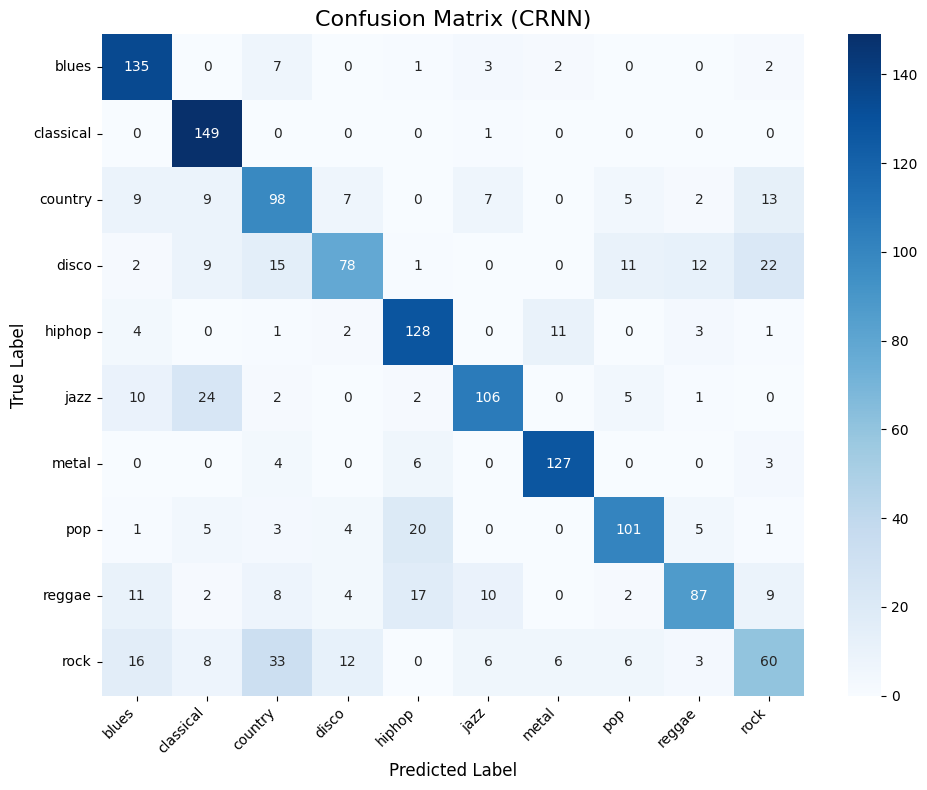


CRNN test accuracy: 0.7222973108291626
Best CRNN model saved at: /content/drive/My Drive/TUD/Projects/Music Genre Classification/best_crnn_model.keras


In [92]:
# ========================================================
# 1. Compile CRNN model
# ========================================================
# First, we need to compile our CRNN model, specifying the optimizer, loss function, and metrics.
# We'll use the Adam optimizer and sparse_categorical_crossentropy as our loss, as our labels are integers.
crnn_model = compile_model(crnn_model, lr=1e-3)

# ========================================================
# 2. Define NEW callbacks (save to Google Drive)
# ========================================================
# Callbacks are special functions that run during training (at the beginning, end of epochs, etc.).
# They help us manage the training process, like stopping early or saving the best model.

drive_model_path = "/content/drive/My Drive/TUD/Projects/Music Genre Classification/best_crnn_model.keras"

# EarlyStopping: This callback monitors a metric (like validation loss) and stops training
# if it doesn't improve after a certain number of epochs (patience). This prevents overfitting.
early_stopping_cb = callbacks.EarlyStopping(
    monitor="val_loss",       # Monitor the validation loss
    patience=7,               # Wait for 7 epochs for improvement before stopping
    restore_best_weights=True, # Keep the weights from the best performing epoch
    verbose=1                 # Show messages when stopping or restoring weights
)

# ModelCheckpoint: This callback saves the model's weights during training.
# We'll configure it to save only the *best* model based on validation accuracy.
model_checkpoint_cb = callbacks.ModelCheckpoint(
    filepath=drive_model_path, # Path where the best model will be saved
    monitor="val_accuracy",    # Monitor validation accuracy
    save_best_only=True,       # Only save the model if validation accuracy improves
    save_weights_only=False,   # Save the entire model (architecture + weights)
    verbose=1                  # Show messages when a new best model is saved
)

# ReduceLROnPlateau: This callback reduces the learning rate when a metric (val_loss)
# has stopped improving. This can help the model converge better in later stages.
reduce_lr_cb = callbacks.ReduceLROnPlateau(
    monitor="val_loss",      # Monitor validation loss
    factor=0.5,                # Reduce learning rate by a factor of 0.5
    patience=3,                # Wait for 3 epochs without improvement before reducing
    min_lr=1e-6,               # Don't let the learning rate go below this value
    verbose=1                  # Show messages when learning rate is reduced
)

# Combine all our chosen callbacks into a list for the model.fit() function.
crnn_callbacks = [early_stopping_cb, model_checkpoint_cb, reduce_lr_cb]

# ========================================================
# 3. Train CRNN with early stopping + save best model
# ========================================================
# Now, let's train our CRNN model using the prepared data and the callbacks.
# We'll train for a maximum of 60 epochs, but early stopping might stop it sooner.
print("\nStarting CRNN model training...")
crnn_history = crnn_model.fit(
    X_train_cnn,              # Training features (mel spectrograms with channel dim)
    y_train_enc,              # Encoded training labels
    validation_data=(X_val_cnn, y_val_enc), # Validation set for monitoring performance
    epochs=60,                # Maximum number of training epochs
    batch_size=32,            # Number of samples per gradient update
    callbacks=crnn_callbacks, # Our list of callbacks
    verbose=1                 # Show progress for each epoch
)
print("CRNN model training complete.")

# ========================================================
# 4. Load best model from Google Drive
# ========================================================
# After training, we load the best version of the model that was saved by ModelCheckpoint.
# This ensures we're using the model that performed best on the validation set.
print(f"\nLoading the best CRNN model from: {drive_model_path}")
crnn_best = tf.keras.models.load_model(drive_model_path)
print("Best CRNN model loaded successfully.")

# ========================================================
# 5. Evaluate CRNN best model
# ========================================================
# Finally, we evaluate the best CRNN model on our unseen test set
# to get a final, unbiased assessment of its performance.
crnn_test_loss, crnn_test_acc = evaluate_model(
    crnn_best,                 # The best trained CRNN model
    X_test_cnn,                # Test features
    y_test_enc,                # Encoded test labels
    idx_to_genre=idx_to_genre, # Mapping to show genre names in report
    title_suffix=" (CRNN)"    # Suffix for plot titles
)

print("\nCRNN test accuracy:", crnn_test_acc)
print("Best CRNN model saved at:", drive_model_path)


In [ ]:
#Option B – CRNN (CNN + Bi-LSTM / GRU)

In [36]:
import os
import copy
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt


def set_seed(seed: int = 42) -> None:
    """Make results more reproducible (as much as possible)."""
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

In [37]:
# y_train, y_val, y_test are your labels (strings like: 'jazz', 'rock', ...)
# We encode them into integers for PyTorch classification.

le = LabelEncoder()
le.fit(np.concatenate([y_train, y_val, y_test]))

y_train_enc = le.transform(y_train).astype(np.int64)
y_val_enc   = le.transform(y_val).astype(np.int64)
y_test_enc  = le.transform(y_test).astype(np.int64)

idx_to_genre = {i: g for i, g in enumerate(le.classes_)}
num_classes = len(le.classes_)

print("Classes:", idx_to_genre)

Classes: {0: np.str_('blues'), 1: np.str_('classical'), 2: np.str_('country'), 3: np.str_('disco'), 4: np.str_('hiphop'), 5: np.str_('jazz'), 6: np.str_('metal'), 7: np.str_('pop'), 8: np.str_('reggae'), 9: np.str_('rock')}


In [38]:
# X_train, X_val, X_test are expected to be:
# (N, n_mels, time_frames) as numpy arrays.

X_train_np = X_train.astype(np.float32)
X_val_np   = X_val.astype(np.float32)
X_test_np  = X_test.astype(np.float32)   # IMPORTANT: include this (often missed)

class MelDataset(Dataset):
    """
    Dataset for mel-spectrogram segments.
    X: (N, n_mels, time_frames)
    y: (N,)
    """
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X)                 # float32 tensor
        self.y = torch.from_numpy(y).long()          # int64 tensor for CrossEntropyLoss

    def __len__(self) -> int:
        return self.X.shape[0]

    def __getitem__(self, idx: int):
        return self.X[idx], self.y[idx]


batch_size = 32

train_ds = MelDataset(X_train_np, y_train_enc)
val_ds   = MelDataset(X_val_np,   y_val_enc)
test_ds  = MelDataset(X_test_np,  y_test_enc)

# In Colab/Linux, num_workers=2 is fine.
# If you run on Windows and get multiprocessing issues, set num_workers=0.
num_workers = 2

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False,
                          num_workers=num_workers, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False,
                          num_workers=num_workers, pin_memory=True)

In [39]:
class CRNN_BiGRU(nn.Module):
    """
    CRNN for spectrogram classification:
      - CNN extracts local time-frequency patterns
      - BiGRU models temporal dependencies across time
      - Fully-connected head outputs class logits
    """
    def __init__(self, num_classes: int, n_mels: int, time_frames: int,
                 rnn_hidden: int = 128, dropout_cnn: float = 0.35):
        super().__init__()

        # CNN feature extractor (same spirit as your file)
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),
            nn.Dropout(0.25),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),
            nn.Dropout(0.30),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)),
            nn.Dropout(dropout_cnn),
        )

        # Infer GRU input_size by running a dummy tensor through the CNN once
        with torch.no_grad():
            dummy = torch.zeros(1, 1, n_mels, time_frames)   # (B=1, C=1, H=n_mels, W=time)
            out = self.cnn(dummy)                             # (1, Cc, Hc, Wc)
            _, c, h, w = out.shape
            self._cnn_out_c = c
            self._cnn_out_h = h
            self._cnn_out_w = w
            gru_input_size = c * h                            # features per time step

        # BiGRU over time steps (= Wc)
        self.gru = nn.GRU(
            input_size=gru_input_size,
            hidden_size=rnn_hidden,
            num_layers=1,
            batch_first=True,
            bidirectional=True,
        )

        # Classifier head (2*rnn_hidden because bidirectional)
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(2 * rnn_hidden, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        x: (B, n_mels, time_frames)
        returns logits: (B, num_classes)
        """
        # CNN expects (B, C=1, H=n_mels, W=time)
        x = x.unsqueeze(1)

        # CNN output: (B, Cc, Hc, Wc)
        x = self.cnn(x)

        # Convert CNN feature map to a sequence for GRU:
        # We treat Wc as time steps, and flatten (Cc, Hc) as features.
        b, c, h, w = x.shape
        x = x.permute(0, 3, 1, 2).contiguous()   # (B, Wc, Cc, Hc)
        x = x.view(b, w, c * h)                  # (B, Wc, Cc*Hc)

        # BiGRU output: (B, Wc, 2*rnn_hidden)
        out, _ = self.gru(x)

        # Use the last time step representation
        out_last = out[:, -1, :]                 # (B, 2*rnn_hidden)

        logits = self.classifier(out_last)       # (B, num_classes)
        return logits

In [40]:
set_seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Read input dimensions from your training data
n_mels = X_train_np.shape[1]
time_frames = X_train_np.shape[2]

model = CRNN_BiGRU(num_classes=num_classes, n_mels=n_mels, time_frames=time_frames).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

save_path = "/content/drive/My Drive/TUD/Projects/Music Genre Classification/best_crnn_bigru_pytorch.pt"
os.makedirs(os.path.dirname(save_path), exist_ok=True)  # avoid "No such file or directory"

patience = 7
best_val_acc = 0.0
epochs_no_improve = 0


def run_epoch(model: nn.Module, loader: DataLoader, train: bool):
    """Run one epoch (train or eval). Returns (avg_loss, avg_acc)."""
    model.train() if train else model.eval()

    total_loss = 0.0
    correct = 0
    total = 0

    with torch.set_grad_enabled(train):
        for xb, yb in loader:
            xb = xb.to(device, non_blocking=True)
            yb = yb.to(device, non_blocking=True)

            logits = model(xb)
            loss = criterion(logits, yb)

            if train:
                optimizer.zero_grad(set_to_none=True)
                loss.backward()
                optimizer.step()

            total_loss += loss.item() * xb.size(0)
            preds = torch.argmax(logits, dim=1)
            correct += (preds == yb).sum().item()
            total += xb.size(0)

    return total_loss / total, correct / total


num_epochs = 60
print("\nStarting PyTorch CRNN Bi-GRU training...")

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = run_epoch(model, train_loader, train=True)
    val_loss, val_acc     = run_epoch(model, val_loader,   train=False)

    print(
        f"Epoch {epoch:02d}/{num_epochs} "
        f"train_loss={train_loss:.4f} train_acc={train_acc:.4f} "
        f"val_loss={val_loss:.4f} val_acc={val_acc:.4f}"
    )

    # Save best model by validation accuracy
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print(f"  Saved best model to: {save_path}")
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    # Early stopping
    if epochs_no_improve >= patience:
        print(f"Early stopping triggered. Best val_acc={best_val_acc:.4f}")
        break

# Load best model weights
model.load_state_dict(torch.load(save_path, map_location=device))
model.eval()
print("Loaded best model from:", save_path)
print("Training complete.")

Using device: cuda

Starting PyTorch CRNN Bi-GRU training...
Epoch 01/60 train_loss=2.0255 train_acc=0.2576 val_loss=1.6661 val_acc=0.3351
  Saved best model to: /content/drive/My Drive/TUD/Projects/Music Genre Classification/best_crnn_bigru_pytorch.pt
Epoch 02/60 train_loss=1.6227 train_acc=0.3970 val_loss=1.5043 val_acc=0.4311
  Saved best model to: /content/drive/My Drive/TUD/Projects/Music Genre Classification/best_crnn_bigru_pytorch.pt
Epoch 03/60 train_loss=1.4745 train_acc=0.4482 val_loss=1.5144 val_acc=0.4318
  Saved best model to: /content/drive/My Drive/TUD/Projects/Music Genre Classification/best_crnn_bigru_pytorch.pt
Epoch 04/60 train_loss=1.3734 train_acc=0.4865 val_loss=1.2973 val_acc=0.5176
  Saved best model to: /content/drive/My Drive/TUD/Projects/Music Genre Classification/best_crnn_bigru_pytorch.pt
Epoch 05/60 train_loss=1.2938 train_acc=0.5277 val_loss=1.4336 val_acc=0.4791
Epoch 06/60 train_loss=1.2393 train_acc=0.5422 val_loss=1.2868 val_acc=0.5385
  Saved best mo

Test Accuracy (PyTorch CRNN Bi-GRU): 0.7912

Classification Report:
              precision    recall  f1-score   support

       blues       0.89      0.93      0.91       150
   classical       0.75      0.99      0.85       150
     country       0.83      0.67      0.74       150
       disco       0.70      0.81      0.75       150
      hiphop       0.79      0.87      0.83       150
        jazz       0.81      0.75      0.78       150
       metal       0.88      0.89      0.89       140
         pop       0.78      0.81      0.80       140
      reggae       0.93      0.59      0.72       150
        rock       0.63      0.59      0.61       150

    accuracy                           0.79      1480
   macro avg       0.80      0.79      0.79      1480
weighted avg       0.80      0.79      0.79      1480



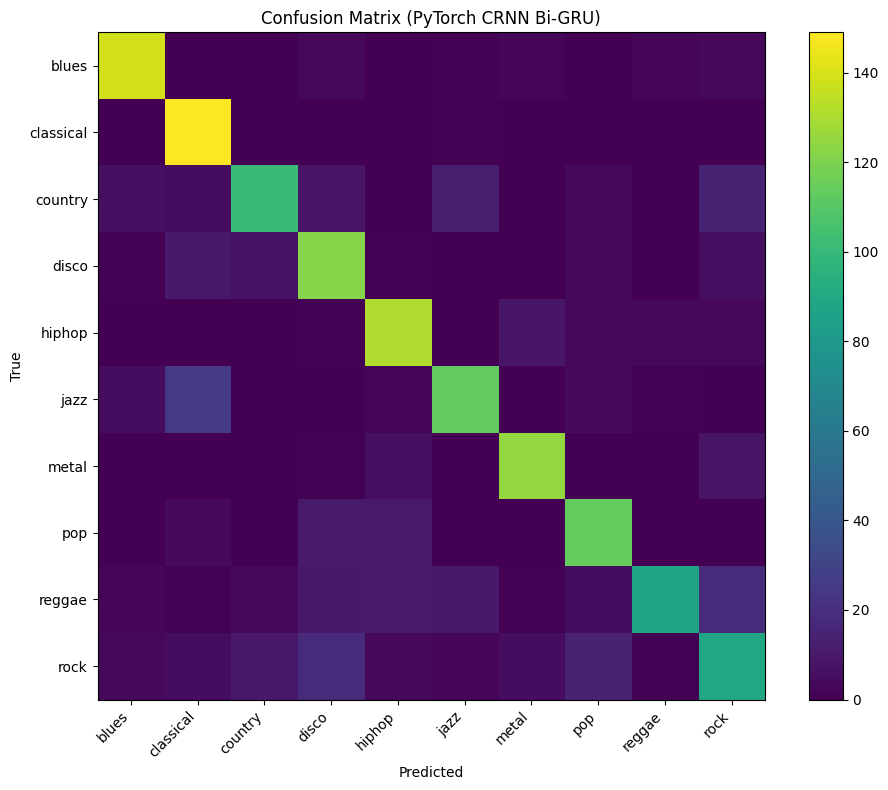

In [41]:
all_preds = []
all_true = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device, non_blocking=True)

        logits = model(xb)
        preds = torch.argmax(logits, dim=1).cpu().numpy()

        all_preds.append(preds)
        all_true.append(yb.numpy())

y_pred = np.concatenate(all_preds)
y_true = np.concatenate(all_true)

test_acc = (y_pred == y_true).mean()
print(f"Test Accuracy (PyTorch CRNN Bi-GRU): {test_acc:.4f}")

target_names = [idx_to_genre[i] for i in range(num_classes)]
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix (PyTorch CRNN Bi-GRU)")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(num_classes), labels=target_names, rotation=45, ha="right")
plt.yticks(ticks=np.arange(num_classes), labels=target_names)
plt.tight_layout()
plt.show()

In [93]:
# Spectrogram Transformer-like model

In [94]:
import os
import copy # Used for deep copying model states, essential for saving the best model during training.
import numpy as np
import torch # The core PyTorch library for neural networks.
import torch.nn as nn # PyTorch's module for defining neural network layers.
from torch.utils.data import Dataset, DataLoader # Utilities for creating custom datasets and loading data in batches.

from sklearn.preprocessing import LabelEncoder # For converting categorical labels to numerical format.
from sklearn.metrics import classification_report, confusion_matrix # Tools for evaluating model performance.
import matplotlib.pyplot as plt # For generating plots, such as confusion matrices.

In [95]:
# Encode labels to integers
# Initialize LabelEncoder, which maps string labels (e.g., 'jazz', 'rock') to unique integers.
le = LabelEncoder()
# Fit the encoder on all unique genre labels found across the entire dataset to ensure consistency.
le.fit(np.concatenate([y_train, y_val, y_test]))

# Transform string labels in each dataset split into their numerical integer representations.
y_train_enc = le.transform(y_train)
y_val_enc   = le.transform(y_val)
y_test_enc  = le.transform(y_test)

# Create a dictionary to easily map integer labels back to their original genre names for interpretability.
idx_to_genre = {i: g for i, g in enumerate(le.classes_)}
# Determine the total number of unique classes, which is needed for the model's output layer.
num_classes = len(le.classes_)

print("Classes:", idx_to_genre)

# Convert the feature data (X_train, X_val, X_test) to float32 NumPy arrays.
# Neural networks typically perform computations with float32 for efficiency and compatibility.
X_train_np = X_train.astype(np.float32)
X_val_np   = X_val.astype(np.float32)
X_test_np  = X_test.astype(np.float32)

Classes: {0: np.str_('blues'), 1: np.str_('classical'), 2: np.str_('country'), 3: np.str_('disco'), 4: np.str_('hiphop'), 5: np.str_('jazz'), 6: np.str_('metal'), 7: np.str_('pop'), 8: np.str_('reggae'), 9: np.str_('rock')}


In [96]:
class MelDataset(Dataset):
    """
    A PyTorch custom Dataset for our Mel-spectrograms.
    It takes preprocessed feature arrays (X) and their corresponding integer labels (y),
    and provides them as PyTorch tensors.
    """
    def __init__(self, X, y):
        # Convert input NumPy arrays to PyTorch tensors.
        # X: Mel-spectrograms, expected shape (N_samples, n_mels, time_frames).
        self.X = torch.from_numpy(X)
        # y: Encoded labels. Using .long() as nn.CrossEntropyLoss expects this type for labels.
        self.y = torch.from_numpy(y).long()

    def __len__(self):
        """Returns the total number of samples in the dataset."""
        return self.X.shape[0]

    def __getitem__(self, idx):
        """
        Retrieves a single Mel-spectrogram and its label by index.
        Returns a tuple (spectrogram_tensor, label_tensor).
        """
        return self.X[idx], self.y[idx]

# Define the batch size for loading data, which determines how many samples are processed at once.
batch_size = 32

# Create instances of the MelDataset for each split (training, validation, testing).
train_ds = MelDataset(X_train_np, y_train_enc)
val_ds   = MelDataset(X_val_np,   y_val_enc)
test_ds  = MelDataset(X_test_np,  y_test_enc)

# Create DataLoader objects for efficient iteration over datasets.
# train_loader: Shuffles data for better generalization during training.
# val_loader, test_loader: No shuffling needed for evaluation.
# num_workers: Number of subprocesses to use for data loading, improving performance.
# pin_memory=True: Transfers data to GPU faster if a GPU is available.
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True,  num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

In [97]:
class SpecPatchEmbedding(nn.Module):
    """
    Converts a 2D spectrogram into a sequence of flattened, linearly embedded patches.
    This is the first step in a Vision Transformer-like architecture for spectrograms.
    """
    def __init__(self, embed_dim=128, patch_size=(16, 16)):
        super().__init__()
        self.patch_h, self.patch_w = patch_size # Height and width of each patch.
        self.embed_dim = embed_dim # The dimension of the embedding vector for each patch.
        # Linear projection layer to embed each flattened patch into 'embed_dim' dimensions.
        self.proj = nn.Linear(self.patch_h * self.patch_w, embed_dim)

    def forward(self, x):
        """
        Forward pass for patch embedding.

        Args:
            x (torch.Tensor): Input spectrogram tensor, shape (B, H, W)
                              where B=batch_size, H=n_mels, W=time_frames.

        Returns:
            torch.Tensor: Embedded patches, shape (B, N_patches, embed_dim).
        """
        B, H, W = x.shape

        # Calculate padding needed to make H and W divisible by patch_h and patch_w.
        pad_h = (self.patch_h - (H % self.patch_h)) % self.patch_h
        pad_w = (self.patch_w - (W % self.patch_w)) % self.patch_w

        # Apply padding if necessary. Pad along the last two dimensions (width then height).
        if pad_h > 0 or pad_w > 0:
            # (padding_left, padding_right, padding_top, padding_bottom)
            x = nn.functional.pad(x, (0, pad_w, 0, pad_h))
            H = H + pad_h # Update height after padding.
            W = W + pad_w # Update width after padding.

        # Reshape the spectrogram into non-overlapping patches.
        # (B, H_patches, patch_h, W_patches, patch_w)
        x = x.view(B, H // self.patch_h, self.patch_h, W // self.patch_w, self.patch_w)
        # Rearrange dimensions to (B, H_patches, W_patches, patch_h, patch_w)
        x = x.permute(0, 1, 3, 2, 4).contiguous()
        # Flatten patches: (B, N_patches, patch_h * patch_w) where N_patches = H_patches * W_patches
        x = x.view(B, (H // self.patch_h) * (W // self.patch_w), self.patch_h * self.patch_w)

        # Project each flattened patch into the embedding dimension.
        x = self.proj(x)  # Result: (B, N_patches, embed_dim)
        return x


class SpectrogramTransformer(nn.Module):
    """
    A Transformer-based model designed for spectrogram classification.
    It processes spectrograms by converting them into sequences of embedded patches,
    adding positional information, and then feeding them through a Transformer Encoder.
    """
    def __init__(self,
                 num_classes,
                 embed_dim=128,      # Dimension for patch embeddings and Transformer layers.
                 patch_size=(16, 16), # Size of square patches to extract from spectrogram.
                 num_layers=4,       # Number of Transformer encoder layers.
                 num_heads=4,        # Number of attention heads in each Transformer layer.
                 ff_dim=256,         # Dimension of the feed-forward network in Transformer layers.
                 dropout=0.1,        # Dropout rate for regularization.
                 max_patches=512):   # Maximum number of patches the model can handle (for positional embedding).
        super().__init__()

        # Step 1: Patch Embedding - Converts spectrogram into a sequence of embedded patches.
        self.patch_embed = SpecPatchEmbedding(embed_dim=embed_dim, patch_size=patch_size)

        # Step 2: Learnable [CLS] token - A special token prepended to the sequence,
        # whose final output state is used for classification (similar to BERT).
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))

        # Step 3: Positional Embedding - Adds positional information to the patch embeddings,
        # as Transformers are permutation-invariant without it.
        self.pos_embed = nn.Parameter(torch.zeros(1, max_patches + 1, embed_dim)) # +1 for CLS token

        # Step 4: Transformer Encoder - Core of the model, processes the sequence of embedded patches.
        # TransformerEncoderLayer is a single block.
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,      # Input and output dimension of the layer.
            nhead=num_heads,        # Number of parallel attention heads.
            dim_feedforward=ff_dim, # Dimension of the feed-forward network model.
            dropout=dropout,        # Dropout rate.
            batch_first=True,       # Input/output tensors are (batch, sequence, feature).
            activation="gelu"       # GELU activation function.
        )
        # TransformerEncoder stacks multiple TransformerEncoderLayer instances.
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Step 5: Layer Normalization - Applied before the final classification head.
        self.norm = nn.LayerNorm(embed_dim)

        # Step 6: Classification Head - Takes the [CLS] token's representation and outputs class logits.
        self.head = nn.Sequential(
            nn.Dropout(dropout), # Apply dropout for regularization.
            nn.Linear(embed_dim, num_classes) # Final linear layer maps to the number of output classes.
        )

        # Initialize weights for positional embedding and CLS token.
        nn.init.trunc_normal_(self.pos_embed, std=0.02)
        nn.init.trunc_normal_(self.cls_token, std=0.02)

    def forward(self, x):
        """
        Defines the forward pass of the SpectrogramTransformer model.

        Args:
            x (torch.Tensor): Input spectrograms, shape (B, n_mels, time_frames).

        Returns:
            torch.Tensor: Logits (raw scores) for each class, shape (B, num_classes).
        """
        B = x.size(0) # Get batch size.

        # 1. Apply patch embedding.
        x = self.patch_embed(x)  # Result: (B, N_patches, embed_dim)
        N = x.size(1) # Number of patches.

        # 2. Prepend the learnable [CLS] token to the sequence.
        cls = self.cls_token.expand(B, -1, -1)  # Expand CLS token to match batch size.
        x = torch.cat([cls, x], dim=1)          # Concatenate CLS token with patch embeddings.

        # 3. Add positional embeddings.
        # Check if the number of patches exceeds the maximum allowed by pos_embed.
        if (N + 1) > self.pos_embed.size(1):
            raise ValueError(f"Too many patches ({N}) for max_patches setting. "
                             f"Increase max_patches in the model.")
        x = x + self.pos_embed[:, :N+1, :] # Add relevant portion of positional embeddings.

        # 4. Pass through the Transformer Encoder.
        x = self.encoder(x)      # Result: (B, 1+N_patches, embed_dim)

        # 5. Apply Layer Normalization.
        x = self.norm(x)

        # 6. Extract the [CLS] token's output for classification.
        cls_out = x[:, 0, :]     # The first token in the sequence is the CLS token.

        # 7. Pass through the classification head to get the final logits.
        logits = self.head(cls_out)
        return logits

In [98]:
# Set up the device for computation: use GPU (cuda) if available, otherwise CPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# --- Model Hyperparameters ---
# These parameters can be tuned to optimize model performance.
embed_dim = 128      # Dimension of patch embeddings and Transformer layers.
patch_size = (16, 16) # Size of the patches extracted from the spectrogram.
num_layers = 4       # Number of Transformer encoder blocks.
num_heads = 4        # Number of attention heads in each Transformer block.
ff_dim = 256         # Dimension of the feed-forward network in each Transformer block.
dropout = 0.1        # Dropout rate for regularization.
# Maximum number of patches the model can handle. Calculated based on input spectrogram size (128x130)
# (128/16) * (130/16) ~= 8 * 8.125. With padding, say 8*9 = 72 patches. So 512 is more than enough.
max_patches = 512

# Initialize the SpectrogramTransformer model with the defined hyperparameters.
# Move the model to the selected device (GPU/CPU).
model = SpectrogramTransformer(
    num_classes=num_classes, # Total number of output classes (genres).
    embed_dim=embed_dim,
    patch_size=patch_size,
    num_layers=num_layers,
    num_heads=num_heads,
    ff_dim=ff_dim,
    dropout=dropout,
    max_patches=max_patches
).to(device)

# Define the loss function: CrossEntropyLoss is appropriate for multi-class classification.
criterion = nn.CrossEntropyLoss()
# Define the optimizer: AdamW is a variant of Adam that incorporates weight decay for better regularization.
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=1e-2)

# Define the file path where the best performing model's state will be saved.
save_path = "/content/drive/My Drive/TUD/Projects/Music Genre Classification/best_spectrogram_transformer.pt"

# --- Early Stopping Configuration ---
patience = 7          # Number of epochs to wait for improvement in validation accuracy before stopping.
best_val_acc = 0.0    # Stores the highest validation accuracy achieved.
epochs_no_improve = 0 # Counter for consecutive epochs without validation accuracy improvement.
best_state = None     # Will store the model's state_dict at the epoch with best_val_acc.

def run_epoch(loader, train=True):
    """
    Executes a single epoch of training or validation/testing for the model.

    Args:
        loader (DataLoader): The DataLoader providing data for the epoch.
        train (bool): True for training mode (enables gradient calculation and weight updates),
                      False for evaluation mode (disables gradients).

    Returns:
        tuple: (average_loss_per_sample, average_accuracy_per_sample) for the epoch.
    """
    # Set the model to training or evaluation mode.
    model.train() if train else model.eval()

    total_loss = 0.0 # Accumulator for total loss.
    correct = 0      # Accumulator for correct predictions.
    total = 0        # Accumulator for total samples processed.

    # Context manager to enable/disable gradient calculation based on 'train' flag.
    with torch.set_grad_enabled(train):
        for xb, yb in loader:
            # Move input features (spectrograms) and labels to the designated device.
            xb = xb.to(device, non_blocking=True)  # (B, n_mels, time)
            yb = yb.to(device, non_blocking=True)

            # Forward pass: get model's predictions (logits).
            logits = model(xb)
            # Calculate the loss.
            loss = criterion(logits, yb)

            if train:
                # Zero previous gradients.
                optimizer.zero_grad()
                # Backpropagate to compute gradients.
                loss.backward()
                # Update model parameters.
                optimizer.step()

            # Accumulate loss and accuracy metrics.
            total_loss += loss.item() * xb.size(0)
            preds = torch.argmax(logits, dim=1) # Get predicted class indices.
            correct += (preds == yb).sum().item()
            total += xb.size(0)

    # Return average loss and accuracy for the epoch.
    return total_loss / total, correct / total

# Define the total number of training epochs.
num_epochs = 100

print("\nStarting Spectrogram Transformer model training...")
# --- Main Training Loop ---
for epoch in range(1, num_epochs + 1):
    # Run training phase for one epoch.
    train_loss, train_acc = run_epoch(train_loader, train=True)
    # Run validation phase for one epoch.
    val_loss, val_acc     = run_epoch(val_loader, train=False)

    # Print current epoch's results.
    print(f"Epoch {epoch:02d}/{num_epochs} "
          f"train_loss={train_loss:.4f} train_acc={train_acc:.4f} "
          f"val_loss={val_loss:.4f} val_acc={val_acc:.4f}")

    # --- Check for Best Model and Save ---
    # If current validation accuracy is an improvement:
    if val_acc > best_val_acc:
        best_val_acc = val_acc # Update best accuracy.
        best_state = copy.deepcopy(model.state_dict()) # Deep copy the model's weights.
        torch.save(best_state, save_path) # Save the best model state to file.
        print(f"  Saved best model to: {save_path}")
        epochs_no_improve = 0 # Reset early stopping counter.
    else:
        epochs_no_improve += 1 # Increment counter if no improvement.

    # --- Early Stopping Check ---
    # If validation accuracy hasn't improved for 'patience' epochs, stop training.
    if epochs_no_improve >= patience:
        print(f"Early stopping triggered. Best val_acc={best_val_acc:.4f}")
        break # Exit the training loop.

# After training, load the weights of the best performing model.
model.load_state_dict(torch.load(save_path, map_location=device))
print("Loaded best model from:", save_path)
print("Spectrogram Transformer model training complete.")

Using device: cuda

Starting Spectrogram Transformer model training...
Epoch 01/100 train_loss=1.7318 train_acc=0.3612 val_loss=1.5031 val_acc=0.4324
  Saved best model to: /content/drive/My Drive/TUD/Projects/Music Genre Classification/best_spectrogram_transformer.pt
Epoch 02/100 train_loss=1.3092 train_acc=0.5242 val_loss=1.4079 val_acc=0.4973
  Saved best model to: /content/drive/My Drive/TUD/Projects/Music Genre Classification/best_spectrogram_transformer.pt
Epoch 03/100 train_loss=1.0908 train_acc=0.6083 val_loss=1.3879 val_acc=0.5142
  Saved best model to: /content/drive/My Drive/TUD/Projects/Music Genre Classification/best_spectrogram_transformer.pt
Epoch 04/100 train_loss=0.9077 train_acc=0.6758 val_loss=1.2011 val_acc=0.5865
  Saved best model to: /content/drive/My Drive/TUD/Projects/Music Genre Classification/best_spectrogram_transformer.pt
Epoch 05/100 train_loss=0.8106 train_acc=0.7135 val_loss=1.3041 val_acc=0.5709
Epoch 06/100 train_loss=0.6928 train_acc=0.7621 val_loss=1

Test Accuracy (Spectrogram Transformer): 0.6372

Classification Report:
              precision    recall  f1-score   support

       blues       0.72      0.72      0.72       150
   classical       0.70      0.97      0.81       150
     country       0.48      0.53      0.50       150
       disco       0.69      0.55      0.61       150
      hiphop       0.85      0.66      0.74       150
        jazz       0.70      0.69      0.70       150
       metal       0.85      0.79      0.82       140
         pop       0.52      0.69      0.60       140
      reggae       0.50      0.40      0.44       150
        rock       0.42      0.38      0.40       150

    accuracy                           0.64      1480
   macro avg       0.64      0.64      0.63      1480
weighted avg       0.64      0.64      0.63      1480



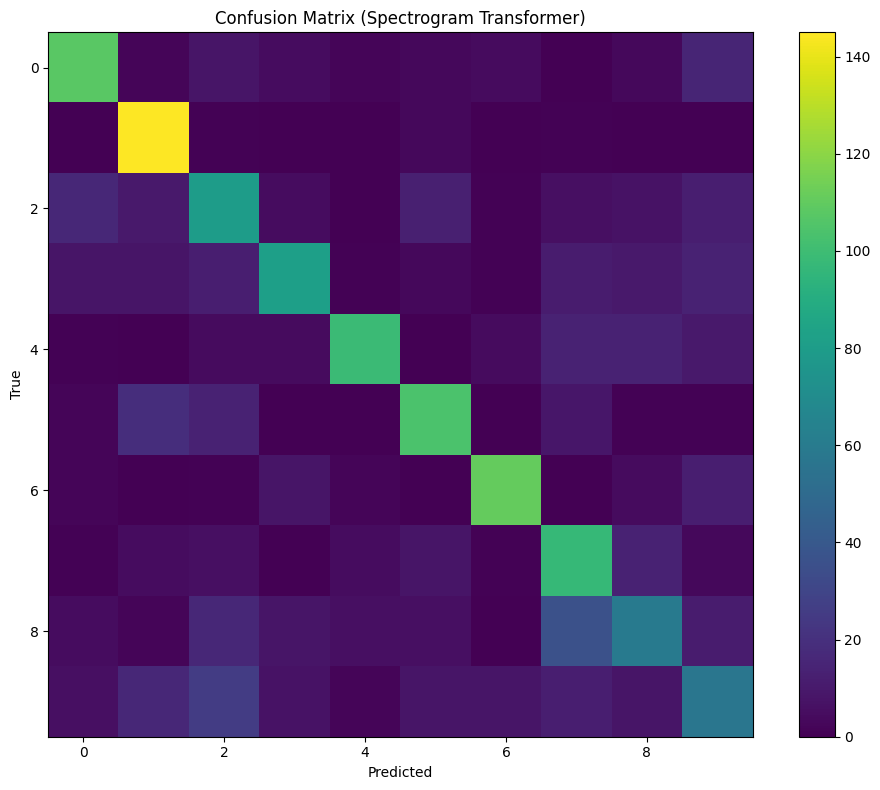

In [99]:
# Set the model to evaluation mode. This disables dropout and batch normalization updates.
model.eval()

# Initialize lists to store all predictions and true labels from the test set.
all_preds = []
all_true = []

# Disable gradient calculations during evaluation to save memory and speed up computation.
with torch.no_grad():
    # Iterate over the test data loader.
    for xb, yb in test_loader:
        # Move the input features (xb) to the appropriate device (GPU/CPU).
        xb = xb.to(device, non_blocking=True)

        # Perform a forward pass to get the model's predictions (logits).
        logits = model(xb)
        # Get the predicted class by finding the index of the maximum logit, then move to CPU and convert to NumPy.
        preds = torch.argmax(logits, dim=1).cpu().numpy()

        # Append the predictions and true labels (converted to NumPy) to their respective lists.
        all_preds.append(preds)
        all_true.append(yb.numpy())

# Concatenate all predictions and true labels from batches into single NumPy arrays.
y_pred = np.concatenate(all_preds)
y_true = np.concatenate(all_true)

# Calculate the overall test accuracy.
test_acc = (y_pred == y_true).mean()
print(f"Test Accuracy (Spectrogram Transformer): {test_acc:.4f}")

# Prepare target names for the classification report using our idx_to_genre mapping.
target_names = [idx_to_genre[i] for i in sorted(idx_to_genre)]
print("\nClassification Report:")
# Generate and print a detailed classification report including precision, recall, and f1-score.
print(classification_report(y_true, y_pred, target_names=target_names))

# Compute the confusion matrix to visualize prediction errors per class.
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using matplotlib.
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation="nearest") # Display the matrix as an image.
plt.title("Confusion Matrix (Spectrogram Transformer)")
plt.colorbar() # Add a color bar to indicate value intensity.
plt.xlabel("Predicted") # Label for the x-axis.
plt.ylabel("True") # Label for the y-axis.
plt.tight_layout() # Adjust plot to prevent labels from overlapping.
plt.show() # Display the plot.

In [100]:
#Explainable AI (XAI)

In [42]:
!pip -q install captum


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 33.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
ope

In [62]:
import torch
import numpy as np

device = next(model.parameters()).device
model.eval()

# Pick one test example (spectrogram segment)
x0, y0 = test_ds[0]                 # x0: (n_mels, time_frames)
x0 = x0.unsqueeze(0).to(device)     # (1, n_mels, time_frames)
y0 = int(y0)

with torch.no_grad():
    logits = model(x0)
    pred = int(torch.argmax(logits, dim=1).item())

print("True:", y0, "Pred:", pred)
print("Pred genre:", idx_to_genre[pred])


True: 6 Pred: 6
Pred genre: metal


In [63]:
from captum.attr import IntegratedGradients

ig = IntegratedGradients(model)

# Baseline: all-zeros spectrogram (common for normalized log-mels)
baseline = torch.zeros_like(x0)

target_class = pred  # explain the predicted class; or set to y0 to explain the true class

model.train() # Switch model to training mode for gradient computation
attr_ig = ig.attribute(
    inputs=x0,
    baselines=baseline,
    target=target_class,
    n_steps=64
)  # shape: (1, n_mels, time_frames)
model.eval()  # Switch model back to evaluation mode

attr_ig = attr_ig.squeeze(0).detach().cpu().numpy()
x0_np = x0.squeeze(0).detach().cpu().numpy()

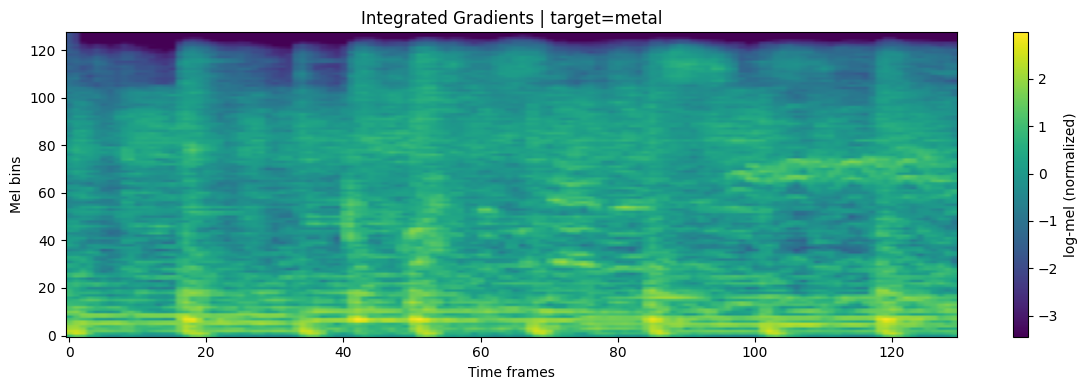

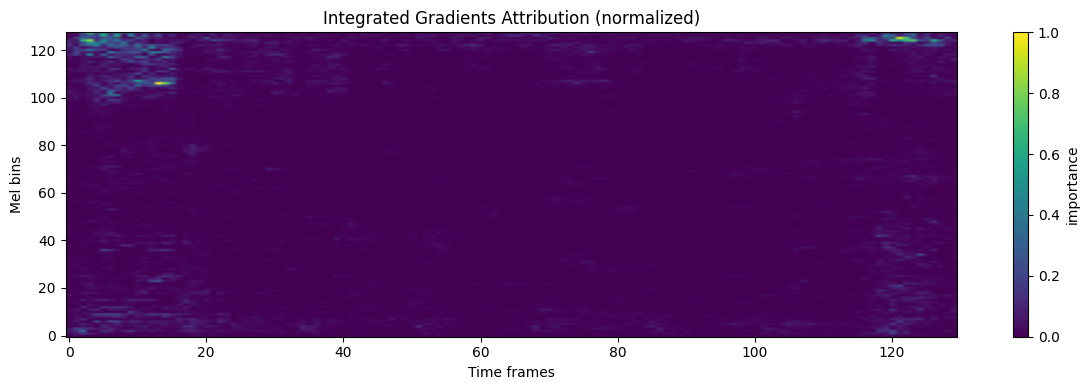

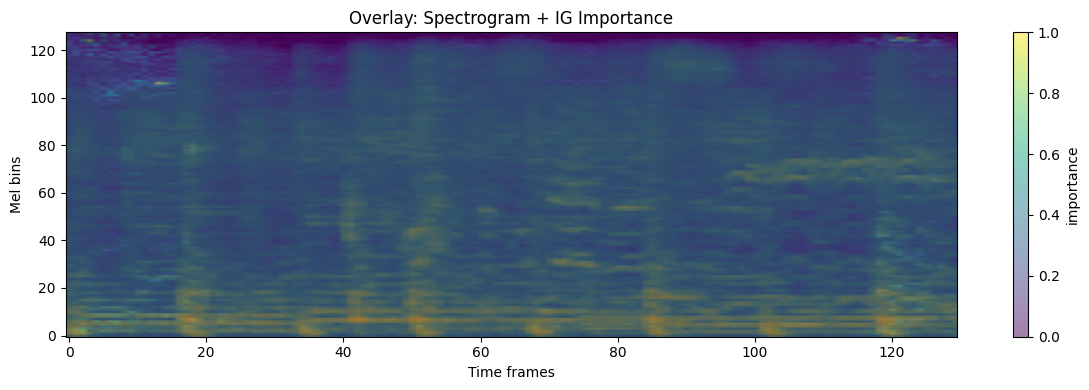

In [64]:
import matplotlib.pyplot as plt

# Normalize attribution for visualization
A = np.abs(attr_ig)
A = (A - A.min()) / (A.max() - A.min() + 1e-9)

plt.figure(figsize=(12, 4))
plt.title(f"Integrated Gradients | target={idx_to_genre[target_class]}")
plt.imshow(x0_np, aspect="auto", origin="lower")
plt.colorbar(label="log-mel (normalized)")
plt.xlabel("Time frames")
plt.ylabel("Mel bins")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.title("Integrated Gradients Attribution (normalized)")
plt.imshow(A, aspect="auto", origin="lower")
plt.colorbar(label="importance")
plt.xlabel("Time frames")
plt.ylabel("Mel bins")
plt.tight_layout()
plt.show()

# Overlay (spectrogram + importance)
plt.figure(figsize=(12, 4))
plt.title("Overlay: Spectrogram + IG Importance")
plt.imshow(x0_np, aspect="auto", origin="lower")
plt.imshow(A, aspect="auto", origin="lower", alpha=0.5)  # overlay
plt.colorbar(label="importance")
plt.xlabel("Time frames")
plt.ylabel("Mel bins")
plt.tight_layout()
plt.show()


In [65]:
import torch.nn.functional as F

# Find the last conv layer in the CNN
last_conv = None
for m in model.cnn.modules():
    if isinstance(m, torch.nn.Conv2d):
        last_conv = m
assert last_conv is not None

activations = {}
gradients = {}

def fwd_hook(module, inp, out):
    activations["value"] = out

def bwd_hook(module, grad_in, grad_out):
    gradients["value"] = grad_out[0]

h1 = last_conv.register_forward_hook(fwd_hook)
h2 = last_conv.register_full_backward_hook(bwd_hook)

# Forward + backward for target class
model.zero_grad(set_to_none=True)
model.train() # Temporarily switch model to training mode for gradient computation
logits = model(x0)
score = logits[0, target_class]
score.backward()
model.eval()  # Switch model back to evaluation mode

A = activations["value"]          # (1, C, Hc, Wc)
G = gradients["value"]            # (1, C, Hc, Wc)

# Global-average pool gradients over spatial dims -> weights per channel
weights = G.mean(dim=(2,3), keepdim=True)   # (1, C, 1, 1)

cam = (weights * A).sum(dim=1, keepdim=True)  # (1, 1, Hc, Wc)
cam = F.relu(cam)

# Upsample CAM to input spectrogram size (n_mels, time_frames)
cam_up = F.interpolate(cam, size=x0.shape[-2:], mode="bilinear", align_corners=False)
cam_up = cam_up.squeeze().detach().cpu().numpy()

# Normalize for plotting
cam_up = (cam_up - cam_up.min()) / (cam_up.max() - cam_up.min() + 1e-9)

# Remove hooks
h1.remove(); h2.remove()


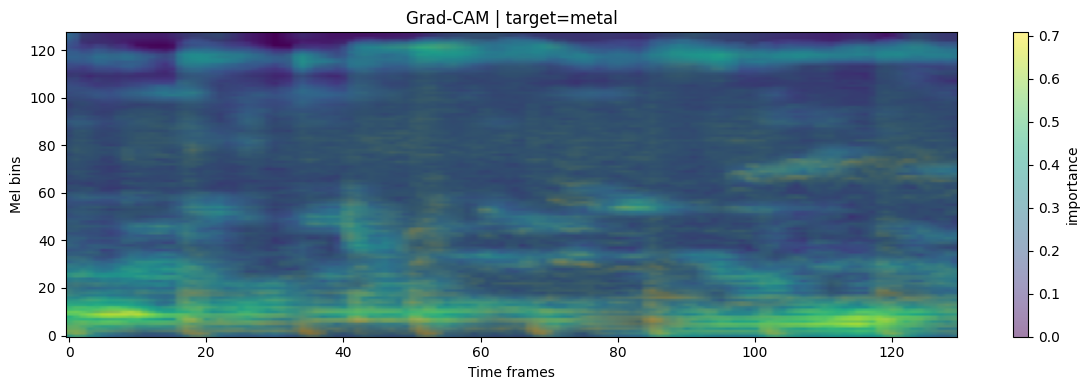

In [66]:
plt.figure(figsize=(12,4))
plt.title(f"Grad-CAM | target={idx_to_genre[target_class]}")
plt.imshow(x0_np, aspect="auto", origin="lower")
plt.imshow(cam_up, aspect="auto", origin="lower", alpha=0.5)
plt.colorbar(label="importance")
plt.xlabel("Time frames")
plt.ylabel("Mel bins")
plt.tight_layout()
plt.show()


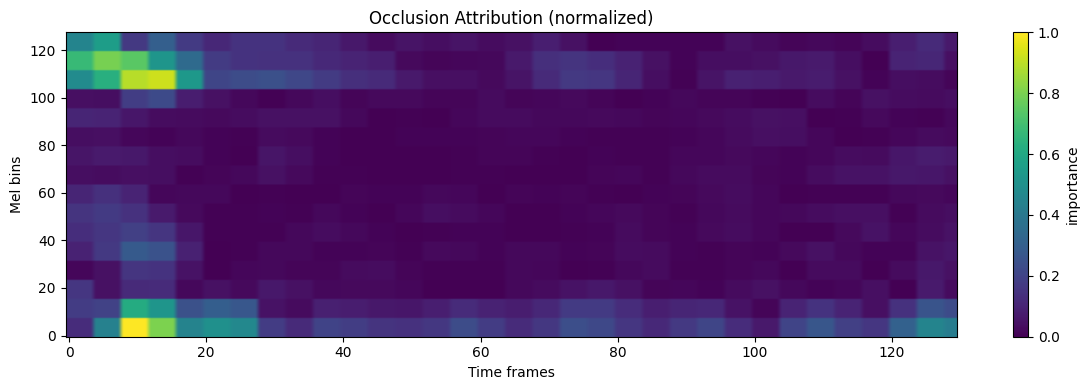

In [67]:
from captum.attr import Occlusion

occ = Occlusion(model)

# sliding_window_shapes must match input dims (n_mels, time_frames)
# Example: occlude 16 mel-bins x 8 time-frames at a time
attr_occ = occ.attribute(
    inputs=x0,
    target=target_class,
    sliding_window_shapes=(16, 8),
    strides=(8, 4),
    baselines=0.0
)

attr_occ = attr_occ.squeeze(0).detach().cpu().numpy()
O = np.abs(attr_occ)
O = (O - O.min()) / (O.max() - O.min() + 1e-9)

plt.figure(figsize=(12, 4))
plt.title("Occlusion Attribution (normalized)")
plt.imshow(O, aspect="auto", origin="lower")
plt.colorbar(label="importance")
plt.xlabel("Time frames")
plt.ylabel("Mel bins")
plt.tight_layout()
plt.show()
